#### Loading packages and data

In [ ]:
# Install packages

!pip install linearmodels
!pip install stargazer
!pip install -U DoubleML
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.8/471.8 kB 7.3 MB/s eta 0:00:00


In [ ]:
# Import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotly.express as px
from linearmodels.panel import PanelOLS
from matplotlib.lines import Line2D
import matplotlib.lines as mlines
from scipy.stats import norm
from scipy.stats import shapiro
from sklearn.linear_model import LinearRegression
from stargazer.stargazer import Stargazer

# DML
from sklearn.model_selection import KFold, RepeatedKFold
from sklearn.base import clone
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import doubleml as dml
from doubleml import DoubleMLClusterData


In [ ]:
from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# Load data base
# link = '/content/drive/MyDrive/Data Sets/data_base.csv'
link = 'https://raw.githubusercontent.com/DanielDieckmann/Statistics-and-Data-Science/refs/heads/main/data_basecsv'

database = pd.read_csv(link)
database = database[(database['year'] < 2022)]

# <h3><center>Word count: 3011 (excluding figure titles and equations) </center></h3>

# <h1><center>💵 **Investing in a Green Future** 💵</center></h1>






<center> <h4>🌱 Analyzing the Effect of International Finance for Clean Energy on the Renewable Energy-Generating Capacity in Developing Countries! 🌱</center> </h4>


<center><i> by Luca Pisoni, Omar Abbassi and Daniel Dieckmann (Team Tiger)<i> <center>








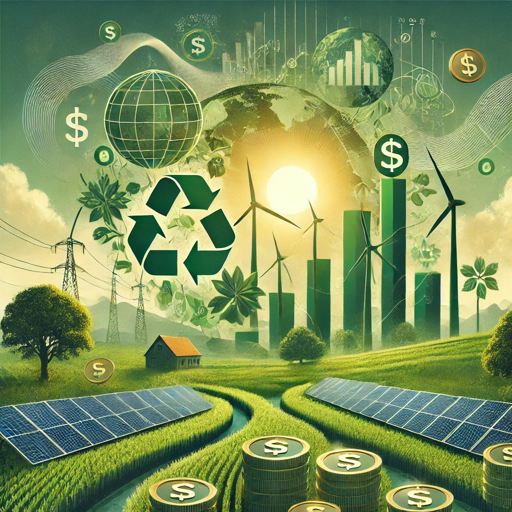

Image generated using ChatGPT 4-o

## **1 Why does this topic matter?** ❗

The increase in renewable energy production is a crucial component of the green transition to reduce carbon emissions effectively (Attanayake et al., 2024). Developing countries will play a key role in this effort, as non-OECD nations are projected to account for 70% of global energy demand by 2040, driven by rapidly expanding populations and economic growth (IEA, 2018). However, global renewable energy investments are primarily directed toward Northern America, Europe, and China (Goldthau et al., 2020). The [UNCTAD World Investment Report](https://unctad.org/publication/world-investment-report-2023) underscores this disparity, noting that less than one-third of the necessary renewable energy investments for developing countries were made in 2022 (UNCTAD, 2023).

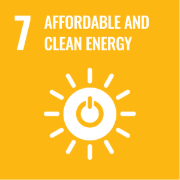

The United Nations addresses this issue with [Sustainable Development Goal (SDG) 7](https://sdgs.un.org/goals/goal7#targets_and_indicators), which seeks to "ensure access to affordable, reliable, sustainable, and modern energy for all". Two of the main sub-targets of SDG 7 include fostering international cooperation to advance SDG 7 (measured by international investment in clean energy) and expanding infrastructure for modern and sustainable energy services (measured by installed renewable energy-generating capacity) in developing countries (United Nations, n.d.). Rather than considering these subtargets separately, we aim to explore whether we can find a **causal relationship** between them. Our assumption is that international finance for clean energy will be invested in renewable energy projects and therefore result in an increase in renewable energy-generating capacity. Consequently, our first hypothesis is:



> 1. More **international finance for clean energy** will lead to more **installed renewable energy-generating capacity** in developing countries.



Additionally, we will try to uncover factors that might affect how efficiently international finance creates new capacity, which could provide insights for policy-making. An aspect we want to investigate is the role of innovativeness, since research suggests that higher innovativeness improves the translation of green finance into renewable capacity (Alharbi et al., 2023). Our second hypothesis is therefore:



> 2. **International finance for clean energy** will have a stronger effect on **renewable energy-generating capacity** in more innovative countries.



## **2 Which data do we need?** 📓

### **2.1 Important variables** 📋

**Independent and Dependent Variable**

Before we embark on our journey, we need to select and define the variables which will play an important role in our research. The two primary variables, X and Y, will be determined by two of the four pillars used to assess progress in SDG 7:

*   **[Independent Variable (X)](https://sdg-indikatoren.de/en/7-a-1/)**: International financial flows to developing countries in support of clean energy research and development and renewable energy production, including in hybrid systems" (in million constant $US). This encompasses loans, grants, and investments. The variable will from now on be referred to as International Finance for Clean Energy (IFCE).
*   **[Dependent variable (Y)](https://sdg-indikatoren.de/en/7-b-1/)**: Installed renewable energy-generating capacity in developing and developed countries (in watts per capita), referring to the net maximum electrical capacity of renewable energy sources at the end of the year. The variable will from now on be referred to as Renewable-Energy Generating Capacity (REC).


However, this intricate relationship is influenced by several additional factors that require our attention:

**Confounders** (variables that affect the independent and the dependent variable):


*   **Gross domestic product (GDP) per capita:** Countries with a lower GDP per capita might attract more funding, whilst countries with a higher GDP per capita might be able to spend more on expanding their own renewable energy capacity (Alshamsi et al., 2015, Ergun & Rivas, 2023).

*   **Trade Openness Index (TOI):** Trade openness could positively affect renewable energy capacity, as it facilitates access to renewable energy technology (Borojo et al., 2024, Tan & Uprasen, 2022). Increased trade openness can have a poitive effect on investment (Ebaidalla, 2024), though this study was limited to top renewable energy producing countries.  

*   **Regulatory Quality:** Countries with higher regulatory quality appear to have higher investments in renewable energy (Liu et al., 2019, Kim, 2020). Higher regulatory quality can also increase the use of clean energy technologies, as shown by Kim (2020), though the sample was limited to South Asian countries.

* **Political Stability**: Political stability is a critical determinant of green growth, with stable political environments fostering investor confidence and encouraging long-term sustainable investments (Qamruzzaman & Karim, 2024).

* **Foreign Direct Investment (% of GDP)**: An increase in renewable energy positively impacts FDI, while a growth in FDI, in turn, supports the development and expansion of renewable energy. This demonstrates the mutually reinforcing relationship between the two (Amri, 2016).


**Covariates** (which in our case presumably only affect the independent variable and could later on serve as instrumental variables):

* **Corruption control**: High corruption and low transparency negatively impact the inflow of FDI to host countries, which might translate to IFRE (Khalid, 2024). It potentially also hinders REC development (De Vibe & Robinson, 2024).

* **Political Globalization**:
Research shows that there appears to be a unidirectional causality from political globalization to FDI (Aluko et al., 2020), the mechanism might be transferable to IFRE.


A **heterogeneity variable** (which explains differences in the extent to which the independent variable affects the dependent variable):

* **Scientific Journal Articles**: Serving as a proxy for innovativeness, this variable may amplify the impact of IFCE on a country's REC by reflecting a nation's capacity for research, development, and technological adoption (Alharbi et al., 2023). Other research uses the number of patents to quantify innovativeness, this data was unavailable for our sample.


The variables and their relationships are summarized in the direct:







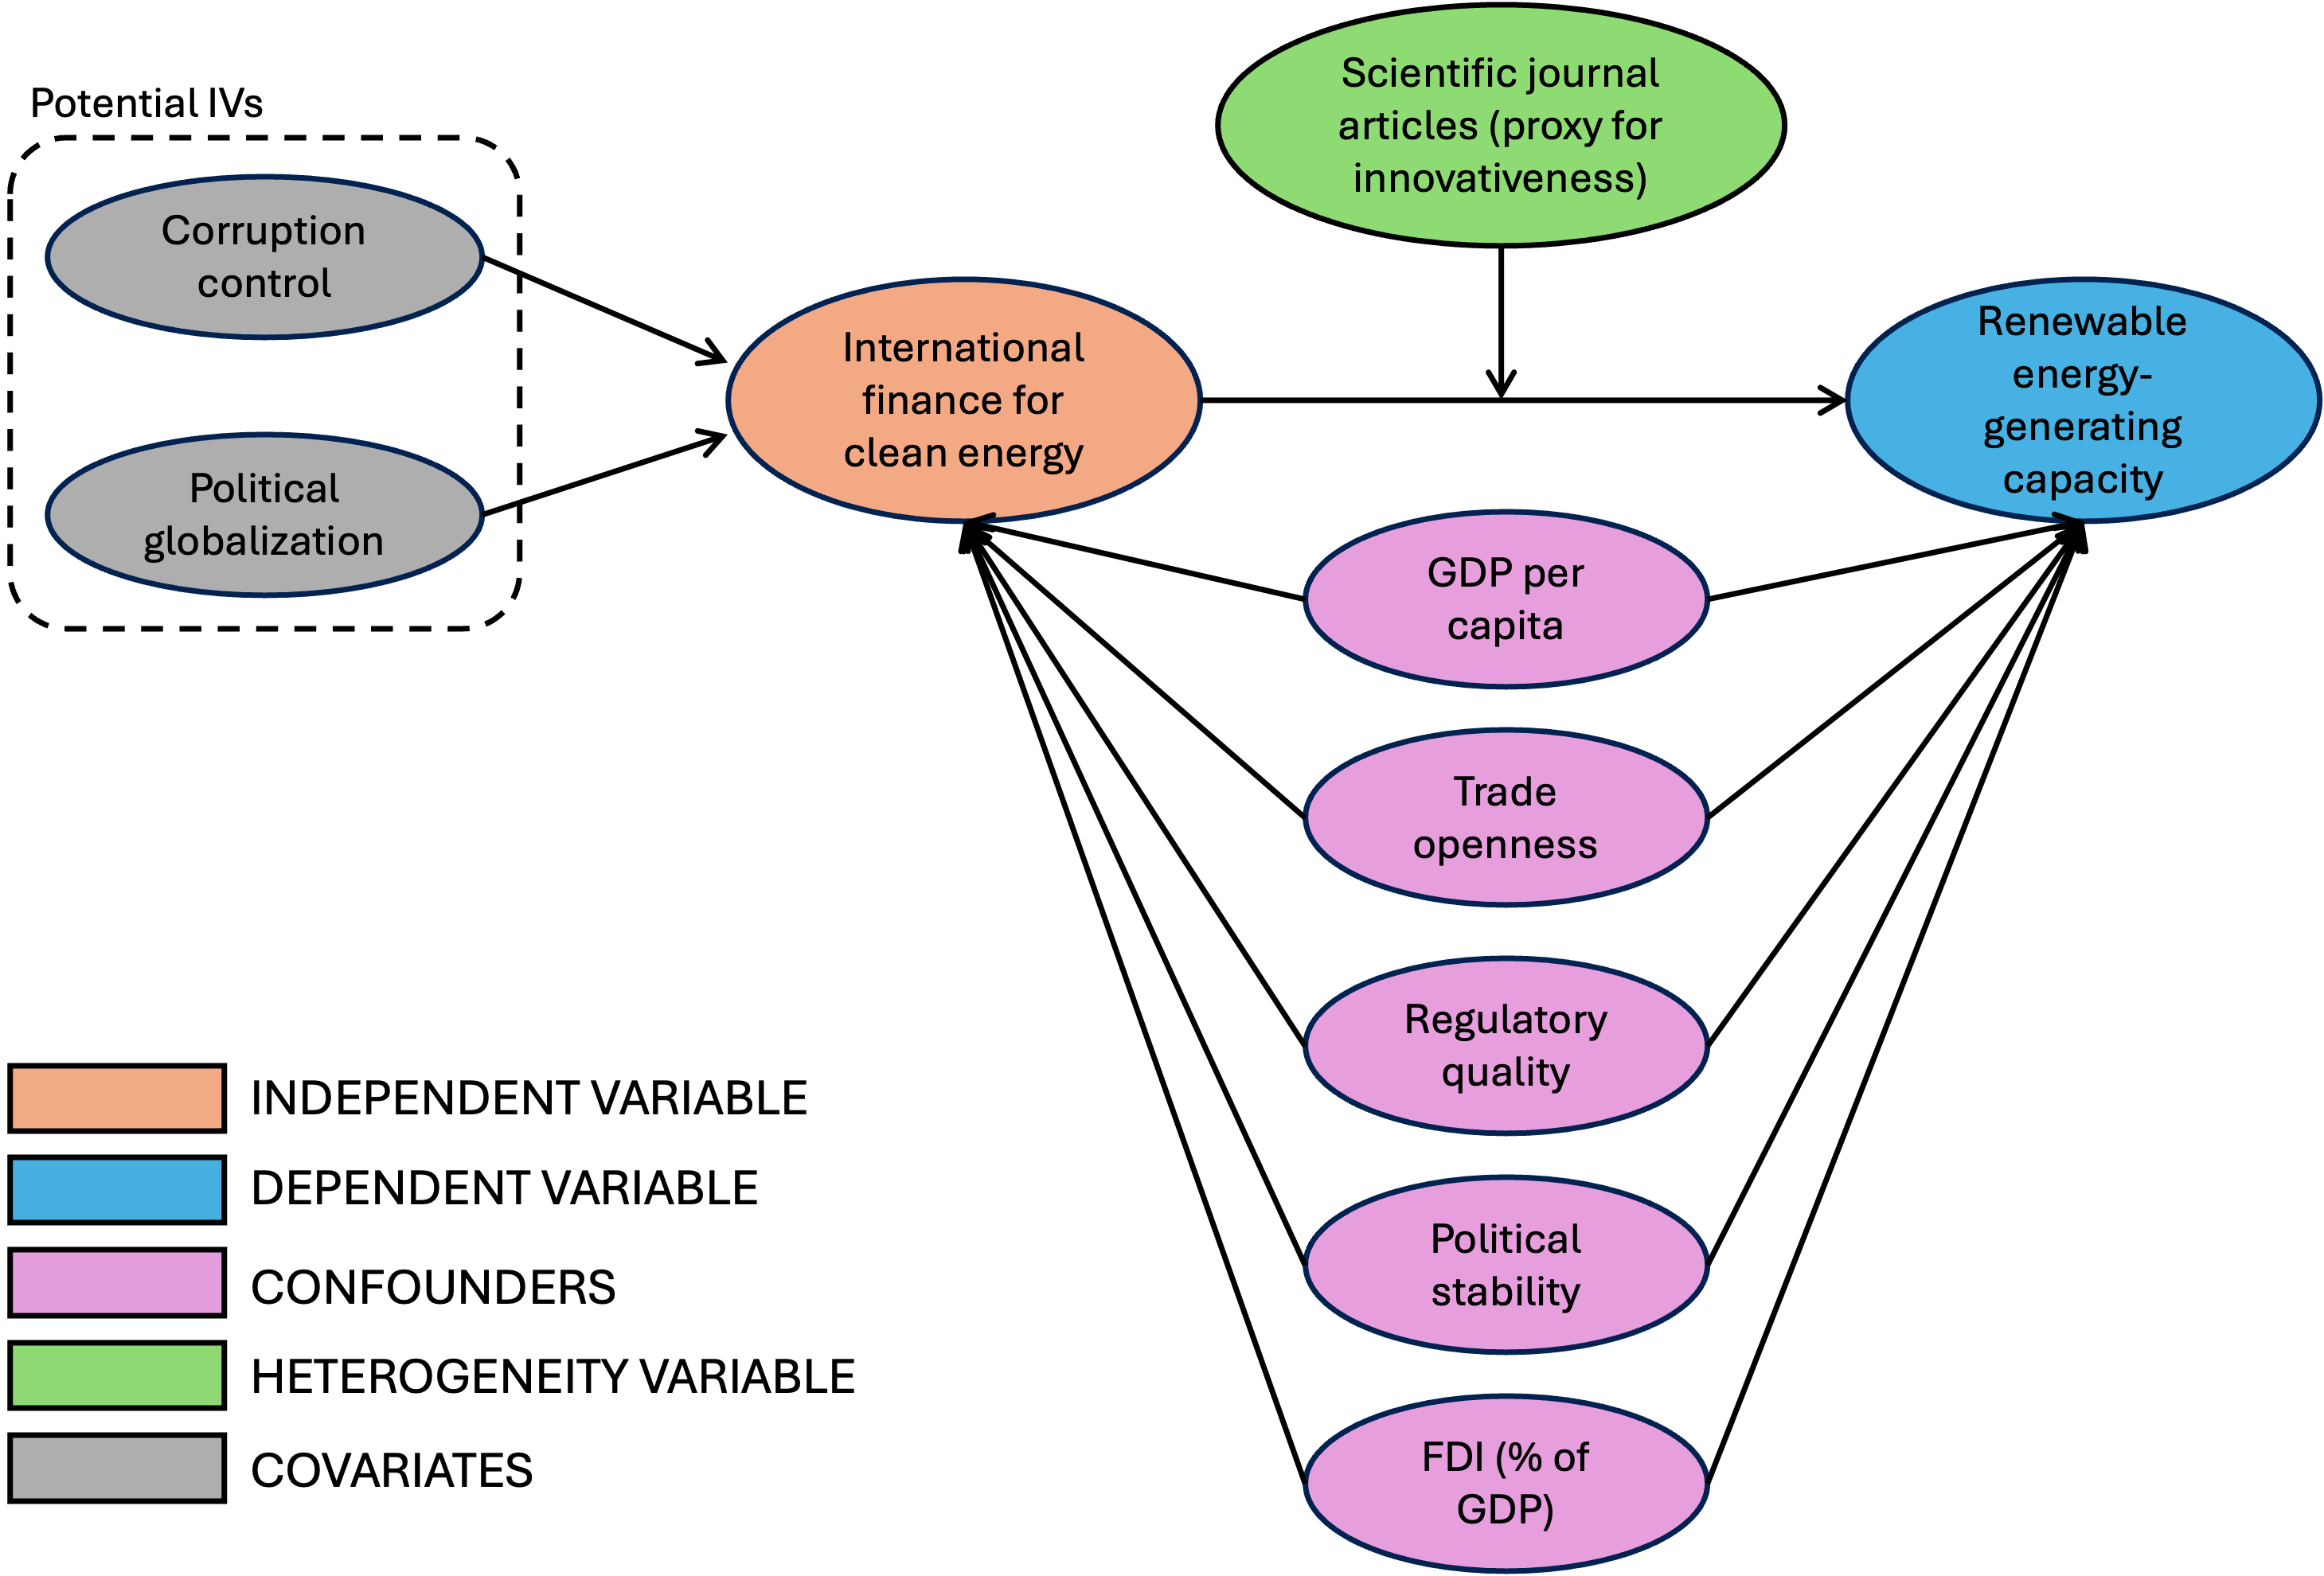

### **2.2 Creating the Database** 🗃

#### **2.2.1 Database Preparation**

The table below provides an excerpt overview of our initial dataset.




In [ ]:
# @title ###### Figure 1: Selection of Ten Random Countries from our Database
selected_columns = database.sample(n=10)[['country', 'year', 'capacity_per_capita', 'international_finance']]
selected_columns

,country,year,capacity_per_capita,international_finance
1899,Viet Nam,2013,165.07025,100.27
1550,Seychelles,2009,0.00000,0.00
731,Fiji,2018,229.08478,5.96
1295,Nepal,2007,22.15470,69.66
1396,Pakistan,2016,41.24538,989.78
780,Georgia,2021,799.94997,5.13
829,Guinea-Bissau,2001,0.00000,3.68
1177,Moldova,2004,14.57872,0.00
1416,Panama,2013,412.79495,1.97
576,Costa Rica,2001,356.52772,139.90




#### **2.2.2 Data Transformations**
**Basic transformations**

*  We decided to transform ICFE to be cumulative from 2000 onwards instead of using the international finance allocated each year, normalizing it over the population (*international_finance_cumulative_per_capita*). Instead of analyzing international finance flow on REC stock, we adjusted to stock on stock to eliminate issues with negative values.

**Logarithmic transformations**

*  Since the *capacity_per_capita* and *international_finance_cumulative_per_capita* variables were highly skewed, it was necessary to apply logarithmic transformations to make the distribution more symmetric. However, since there were some zero values in the data, a small constant equal to the smallest non-zero value for the variable (0.0096 and 0.01, respectively) was added to avoid undefined values when calculating the logarithm. This might introduce bias into our data.

* Taking the logarithm of both the dependent variable and indepedent variable alters the interpretation of the results, as instead of representing absolute changes, they are now interpreted as percentage changes.

**Linear interpolation**

The data for regulatory quality and political stability did not contain data for the year 2001. It was therefore linearly interpolated using the years 2000 and 2001, potentially leading to bias in our data.

**The Lag Effect**

We needed to account for the hypothesized impact of IFCE on REC potentially being delayed. Research suggests that the commissioning time of renewable energy projects is between one and five years, depending on the type of technology (Gumber et al., 2024). To capture this dynamic, we created five separate columns with a one to five-year lag, for the use in our analysis.

### **2.3 Bias in our Data** ⚖

**Control Variables:** Since the relationship between IFCE and REC is highly complex, additional variables might have been overlooked. Furthermore, some variables, like the heterogeneity variable scientific journal articles, are proxies that might not perfectly match the causal mechanisms we are trying to model.

**Sample Selection Bias:** When including more and more variables, some countries needed to be dropped from the analysis due to a lack of available data, leading to data availability bias. Nonetheless, we were able to retain a balanced sample of 84 countries that are spread across the continents with observations over 21 years, as seen in the figure below. Feel free to explore how the renewable energy-generating capacity per capita for each country changed over the years in Figure 2 below.









In [ ]:
# @title ##### Figure 2: Overview of Countries and their Renewable Energy-Generating Capacity (in Watts) over Time
fig = px.choropleth(database,
                    locations="country",
                    locationmode='country names',
                    color="capacity_per_capita",
                    hover_name="country",
                    hover_data=["capacity_per_capita"],
                    animation_frame="year",
                    color_continuous_scale="Plasma",
                    title="Overview of Countries and their Renewable Energy-Generating Capacity (in Watts) over Time")

fig.update_geos(projection_type="natural earth")
fig.show()

## **3 What is our first impression of the data?** 🔍

To start our mission of uncovering a potential causal relationship, we employ data visualization for some initial clues. As shown in the scatter plot in Figure 3, there appears to be a positive correlation, suggesting that more IFCE might be linked to a higher REC, which is in line with our first hypothesis. But let's not forget the most important rule: Correlation does not imply causation. The real detective work is just beginning.

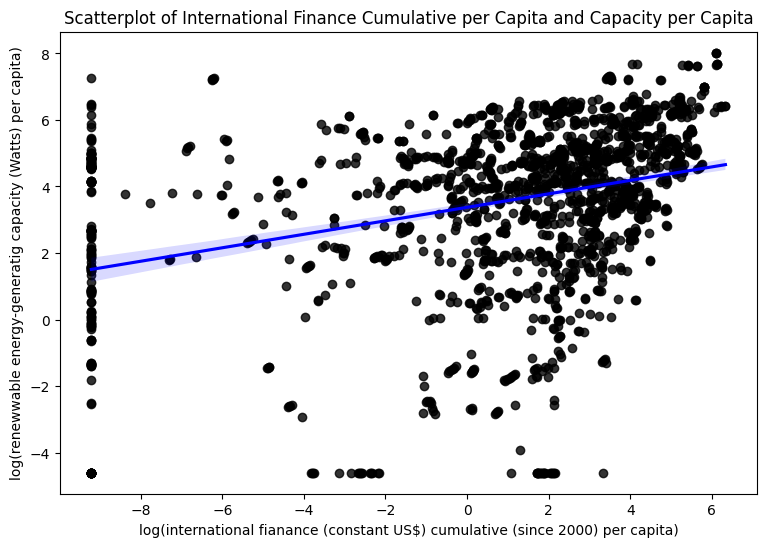

In [ ]:
# @title ##### Figure 3: Scatterplot of International Finance Cumulative per Capita (constant $US) and Capacity per Capita (Watts)
plt.figure(figsize=(9, 6))

sns.regplot(x='international_finance_cumulative_per_capita_log',
            y='capacity_per_capita_log',
            data=database,
            scatter_kws={'color': 'black'},
            line_kws={'color': 'blue'}
           )

plt.title("Scatterplot of International Finance Cumulative per Capita and Capacity per Capita")
plt.xlabel("log(international fianance (constant US$) cumulative (since 2000) per capita)")
plt.ylabel("log(renewwable energy-generatig capacity (Watts) per capita)")
plt.show()

## **4 What can an ordinary least squares regressions tell us?** 📈

### **4.1 Ordinary Least Squares Regression** ◻

For our next step in examining the potential causal relationship, we turn to a method called Ordinary Least Squares (OLS) regression, with the following equation:


$$ renewable \_ energy \_ capacity \_ per \_ capita \_ log_{it} =  α + β_1 internationl \_ finance \_ cumulative \_ per \_ capita \_log_{it} + β_2'X_{it} + u_{it} $$






*   $renewable \_ energy \_ capacity \_ per \_ capita \_log_{it}$ = Depedent variable in year (t) and country (i)

*   $internationl \_ finance \_ cumulative \_ per \_ capita \_log_{it}$ =  Indepedent variable

* $α$ = Intercept term, representing the baseline when all independent variables are zero

* $β_1$ = Coefficient of $internationl \_ finance \_ cumulative \_ per \_ capita \_log_{it}$, eminder: shows impact of IFCE on REC expressed as percetage change (due to log-log transformation)

* $β_2'$ = Row vector encompassing the coefficients of all controls

* $X_{it}$ = Column vector of all controls

* $u_{it}$ = Error term, acounting for variability not explained by the independent variables


### **4.2 Is the effect of international finance delayed?**  ⏰

**Why do we need to consider lag and how do we investigate it?**

Our investigation starts by determining the correct delay of IFCE. As you might recall from Section 2, we introduced the idea that investments made in year t may only show their effects in year t + n. To examine this, we created multiple OLS regressions: Five models where the independent variable was delayed by 1 to 5 years, a model incorporating all lagged variables in a single regression, and models testing "pairs of delays" ([see Appendix 3: Regression Table Lag](#scrollTo=yUk4BkX63Ft9&line=1&uniqifier=1)). To enable this analysis, we reduced the sample for all regressions by excluding the first five years (2000–2004) to maintain consistency across regressions for comparability.

**What are the results and our conclusion?**

When all lagged years are included, only the not lagged variable is statistically significant: 0.154\*\*\* (three asterisks indicate a p-value below 0.01, highlighting a finding's strong statistical significance). In comparison to being used individually (coefficient: 0.342\*\*\*), the coefficient is significantly lower, hinting at a delayed effect of the financing. To "clean" our regression from the lagged effect of IFCE throughout the years, we will consequently use the regression including all lags from this point onwards.



> <font color='blue'> **For the interested reader:**</font> Go to [Appendix A1: Normality of Residuals](#scrollTo=Xlgqt9yJ1wJn&line=1&uniqifier=1) to learn more about an important OLS assumption.



### **4.3 How do controls affect our model?** 🎛

**Why do we need to add controls and how do we investigate them?**

In addition to accounting for lag, we include the confounders identified in Section 2.1 progressively as controls to "clean" the effect of the independent variable more and more from the effect of confounders.


In [ ]:
# Restrict data
database_fixed = database[(database['year'] > 2004)]

# Models with progressive controls
model_1_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_2_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_3_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log + regulatory_quality', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_4_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log + regulatory_quality + political_stability', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_5_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log + regulatory_quality + political_stability + trade_percentage_of_gdp', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_6_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log + regulatory_quality + political_stability + trade_percentage_of_gdp + fdi_percentage_gdp' , data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})

# Creating multiple models
stargazer = Stargazer([model_1_controls, model_2_controls, model_3_controls, model_4_controls, model_5_controls, model_6_controls])

# Displaying the regression table (see Appendix)
stargazer.significant_digits(6)
#stargazer # For the interested reade: Remove hashtag (#) at the beginning of this line if you want to see the results of the code


**What are the results and what do we conclude?**

As expected, some of the variation in our dependent variable appears to be explained by these confounders, reflected in the coefficient decreasing to 0.148\*\*, including a decreased significance. According to this regression, a 1% increase in the cumulative IFCE per capita would lead to a 0.148% increase in REC per capita. GDP per capita positively correlates with REC, hinting at wealthier countries building more REC. Similarly, higher regulatory quality appears to positively affect REC. Despite not all confounders showing statistical significance, we decided to keep them for further exploration in following tests.

> <font color='blue'> **For the interested reader:**</font> We did not yet talk about multicollinearity...sounds interesting, right? If you want to know more, go to [Appendix A2: Multicollineari-what?](#scrollTo=zd0pxkDOiBzc&line=1&uniqifier=1)

### **4.4 Do we need to consider fixed effects?** 🪛

**What are fixed effects and why do we need to add them?**

In the earlier analysis, we examined changes between countries. This does not account for country-specific factors that are constant over time. For example, the geographic conditions could make renewable energy generation easier for some countries compared to others. Adding **country-fixed effects** shifts the evaluation from between-country to within-country variations, thereby removing country-specific effects that are constant over time.

We also overlooked global time trends, such as falling renewable technology costs or international climate agreements. Adding **year-fixed effects** accounts for these overarching time trends. The identified confounders remain part of the regression since they are time-varying and do not necessarily follow global trends. Our model expands to:

$ renewable \_ energy \_ capacity \_ per \_ capita \_ log_{it} =  α + β_1 internationl \_ finance \_ cumulative \_ per \_ capita \_log_{it} + β_2'X_{it} + γ_i  +  λ_t + u_{it}$

*   $γ_i$ = Country fixed effects

*   $λ_t$ = Time fixed effects

In [ ]:
# Restrict and index data
database_fixed = database[(database['year'] > 2004)]
data_fe = database_fixed.set_index(['country', 'year'])

# Regression with entity fixed effects
model = PanelOLS.from_formula(
    'capacity_per_capita_log ~ 1 + international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5 + gdp_per_capita_log + regulatory_quality + political_stability +  trade_percentage_of_gdp + fdi_percentage_gdp + EntityEffects + TimeEffects',
    data=data_fe)

# Display the summary
result = model.fit()

result = model.fit(cov_type='clustered', cluster_entity=True)
#result.summary.tables[1] # For the interested reade: Remove hashtag (#) at the beginning of this line if you want to see the results of the code

**What are the results and what do we conclude?**

After expanding the model, the coefficient of IFCE still hints a positive relationship (0.06), but is not statistically significant anymore. It appears that initially, the coefficient was driven by variations across countries, but is not anymore when adjusting for country-specifc factors and time trends. Surprisingly, regulatory quality is still significant (-0.52\*), but now hints at a negative relationship (could more regulations make it more difficult to build REC?). Trade openness on the other hand seems to positively affect the creation of REC (0.005\*), potentially hinting at a positive effect of collaboration.




>  <font color='blue'> **For the interested reader:**</font> When changing to non-clustered errors, the p-value drops in a statistically significant range. This made us wonder...go to [Appendix A3: Mysterious Outliers](#scrollTo=V-1X5Ykq_ctc&line=1&uniqifier=1) to find out more!



### **4.5 Conclusion OLS Regressions** ⏯

As visible from Figure 4, when model complexity is increased by accounting for more confounding factors, our initial hypothesis of IFCE positively affecting REC cannot be supported, since zero is contained in the coefficient's confidence interval. We can also see that machine learning-supported results are similar to our normal regressions.

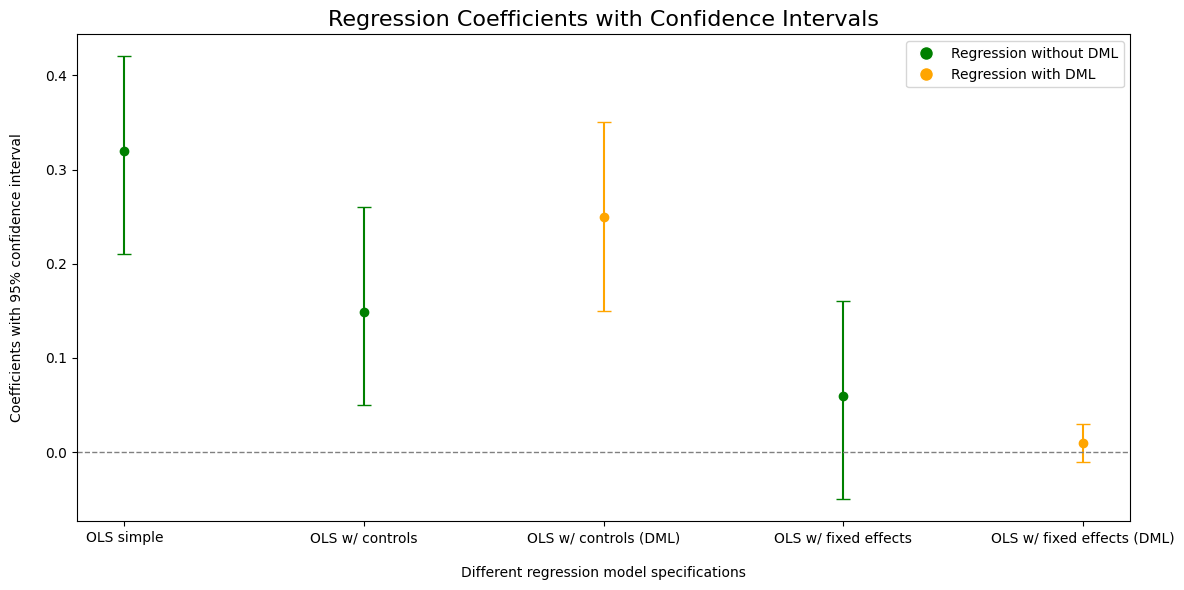

In [ ]:
# @title ##### Figure 4: Regression Coefficients with Confidence Intervals
data = {
    "Model": ["OLS simple",  "OLS w/ controls", "OLS w/ controls (DML)", "OLS w/ fixed effects", "OLS w/ fixed effects (DML)"],
    "Coefficient": [0.32, 0.149, 0.25,  0.06, 0.01],
    "Lower_CI": [0.21, 0.05, 0.15, -0.05, -0.01],
    "Upper_CI": [0.42, 0.26, 0.35,  0.16, 0.03],
    "P_value": [0.00, 0.00, 0.00,  0.30, 0.70],
}

df = pd.DataFrame(data)


colors = ["green", "green", "orange", "green", "orange"]


fig, ax = plt.subplots(figsize=(12, 6))

for idx, row in df.iterrows():
    ax.errorbar(
        idx, row["Coefficient"],
        yerr=[[row["Coefficient"] - row["Lower_CI"]], [row["Upper_CI"] - row["Coefficient"]]],
        fmt='o', color=colors[idx], capsize=5
    )


legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='green', markersize=10, label='Regression without DML'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='orange', markersize=10, label='Regression with DML')
]
ax.legend(handles=legend_elements, loc='upper right')


ax.set_xticks(range(len(df)))
ax.set_xticklabels(df["Model"], rotation=0, ha='center')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.set_ylabel("Coefficients with 95% confidence interval", fontsize=10, labelpad=15)
ax.set_xlabel("Different regression model specifications", fontsize=10, labelpad=15)
ax.set_title("Regression Coefficients with Confidence Intervals", fontsize=16)
plt.tight_layout()

plt.show()



> <font color='blue'> **For the interested reader:**</font> Check out [Appendix A4: Causality and AI? How does that work?](#scrollTo=bqHxt49ipqIN&line=1&uniqifier=1) to find out more about our AI powered regressions.

## **5 Can we find an instrumental variable?** 🔧 <font color='red'>




**What is an instrumental variable and why do we need one?**

In our analysis, we omit domestic finance for renewable energy due to missing data. Additionally, reverse causality may arise, as countries with larger REC might attract more IFRE, as it is the case for FDI (Amri, 2016). To address this issue, we tested two instrumental variables (IVs). These are is used when the independent variable (X) is correlated with the error term ($u$), for example, due to omitted variables or reverse causality. An IV must be:

1. Relevant: Correlated with X.
2. Exogenous: Affects Y only through X and is not correlated with the error term.

If these conditions hold, the IV can be used in two-stage least squares (2SLS). We are testing corruption_control and political_globalization as IVs. They positively impact FDI, and this mechanism could translate to IFRE (relevance). However, we already suspect they might affect REC directly (potentially violating exogeneity). We hope that we reduce this problem by choosing political_globalization (which excludes globalization through trade) over general globalization.

**How do we test it and what are the results?**

We ran three tests, as shown in Figure X. Corruption_control does not significantly predict IFRE, while political_globalization passes the first two tests. However, it violates the exogeneity condition, making it unsuitable as an IV. Therefore, our IV candidates cannot be used in a 2SLS regression. See  [Appendix B3: IV Tests](#scrollTo=fzxbK7LKijWS) for the detailed analysis.


##### **Figure 5: IV Tests**

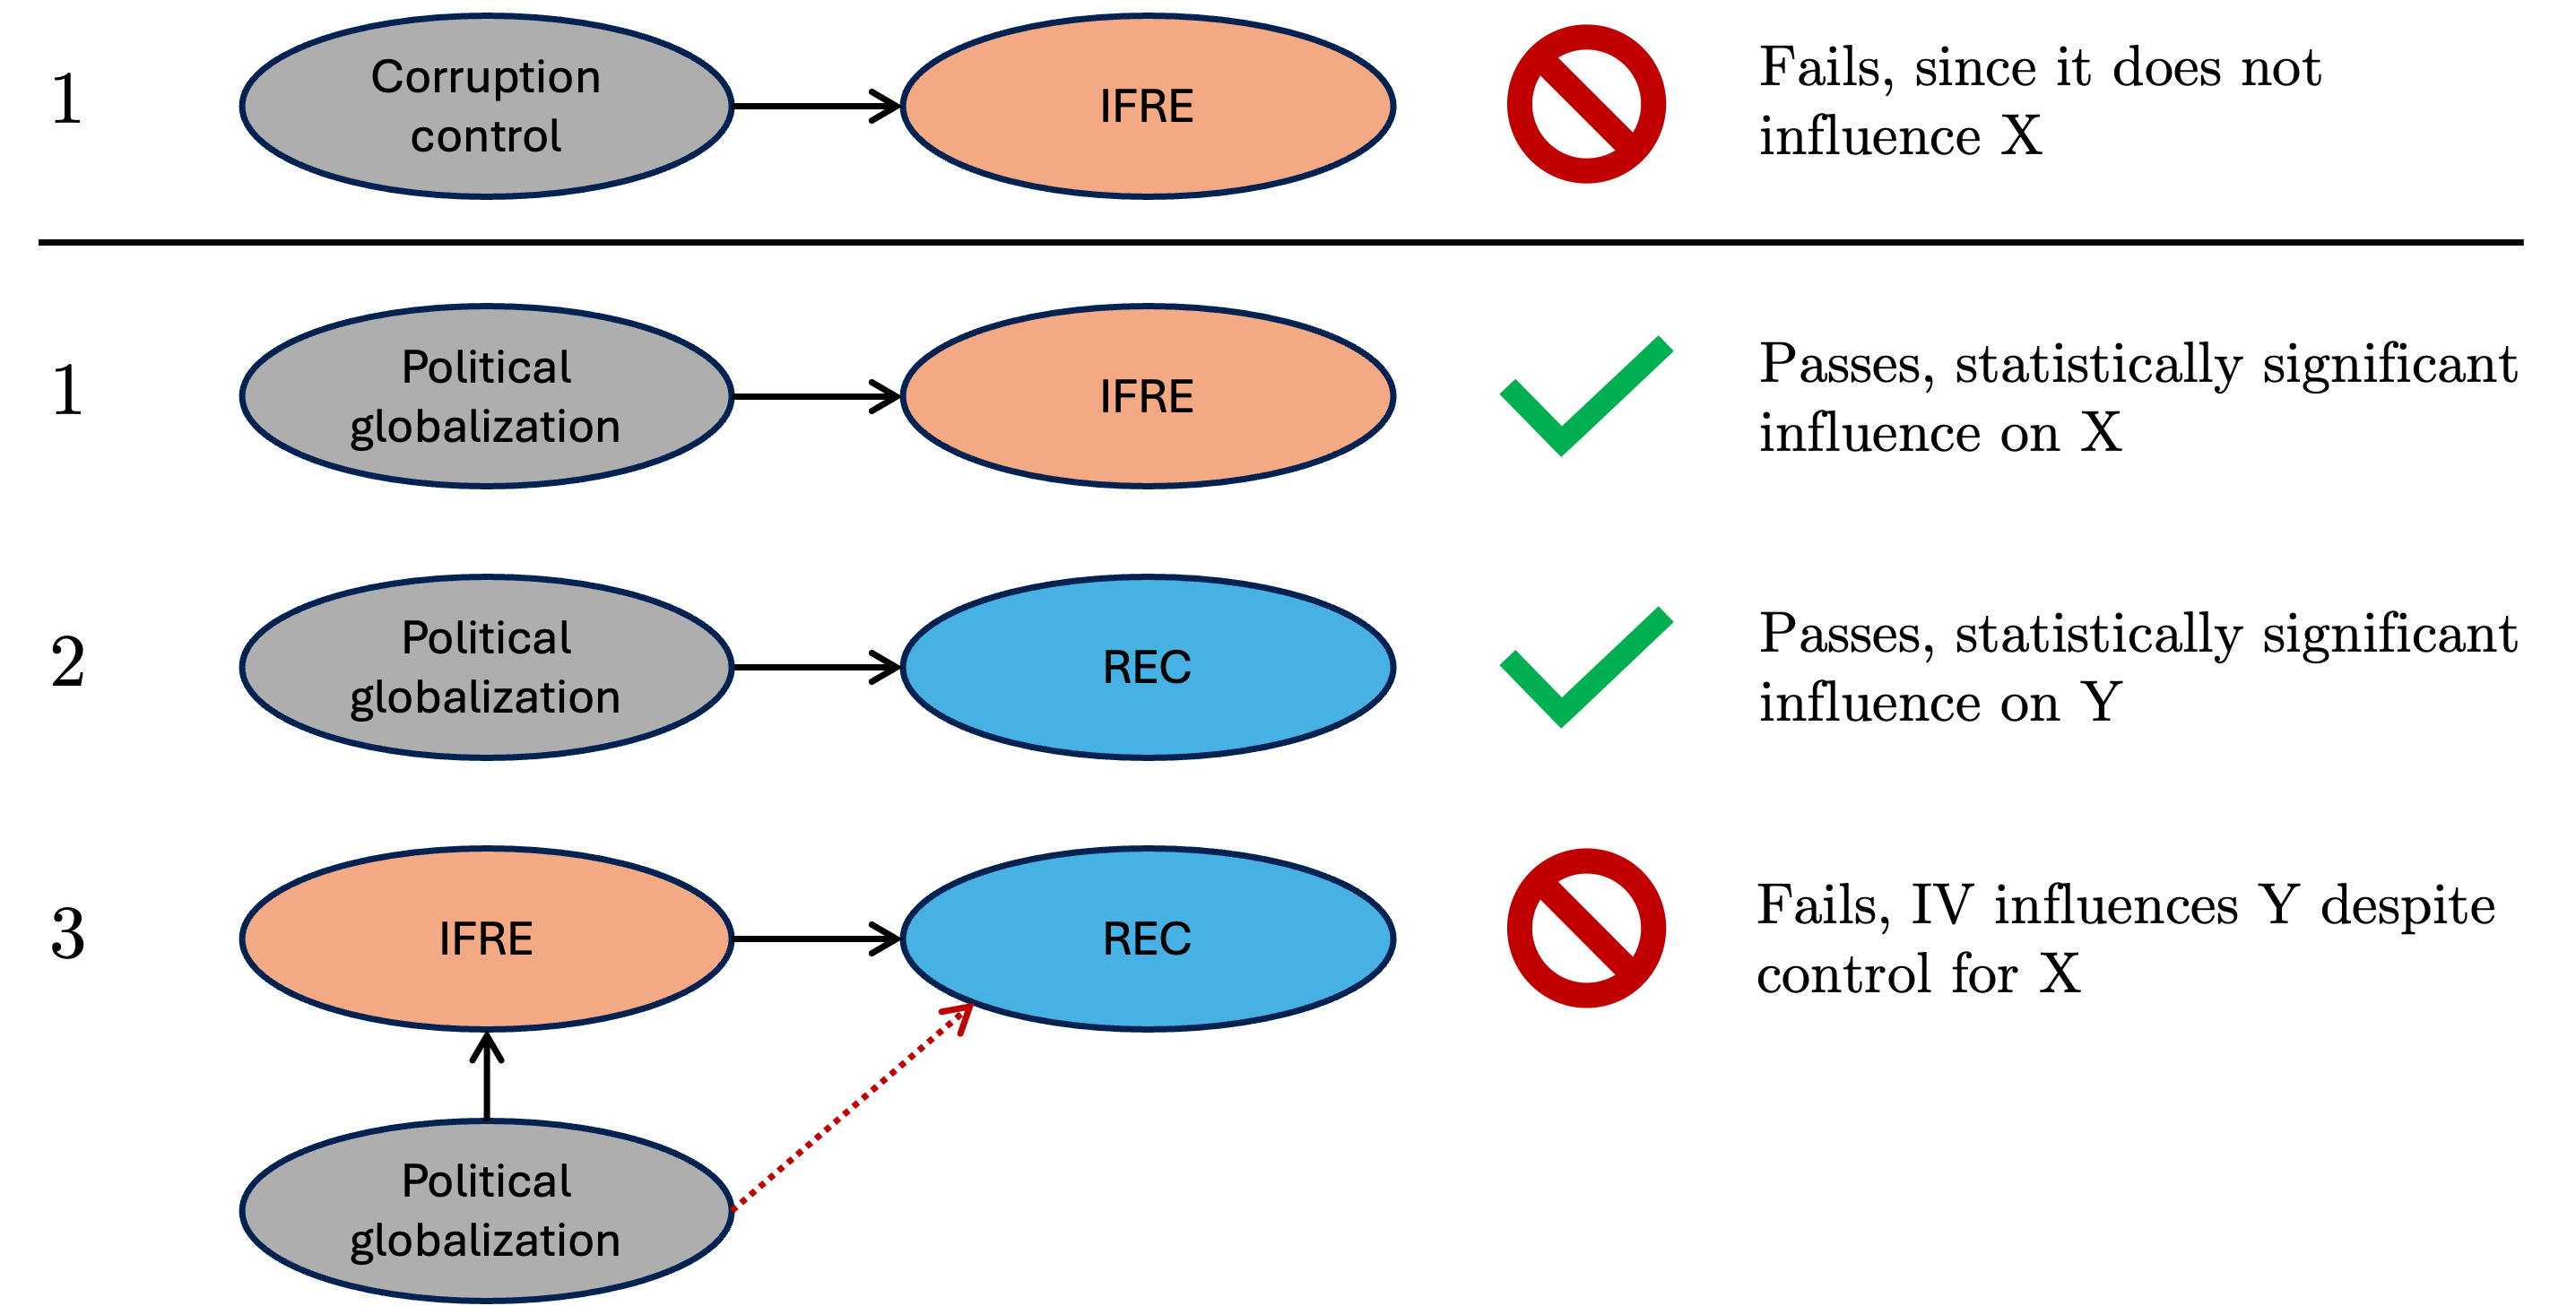

## **6 Is there heterogeneity in our data?** 🔄

**What is heterogeneity and why is it interesting for us?**

Despite not finding a clear evidence for our first hypothesis, we venture into analyzing heterogeneity to examine our second hypothesis. The idea is that the relationship under investigation is not uniform across all observations, but can be increased or decreased depending on the so-called heterogeneity variable. Identifying factors that explain IFCE having a stronger (or weaker) effect on REC could provide insights for policymakers on how to increase the efficiency of IFCE. As explained in Section 2, we use scientific journal articles as a proxy for innovativeness as heterogeneity variable.

**How do we investigate it?**

We split the sample into a below-median and above-median normalized scientific articles group. By plotting the regressions (with country-fixed effects, but without fixed effects and controls) separately, we expected the relationship to be stronger for the above-median group, as more innovative countries should utilize the financing more efficiently.

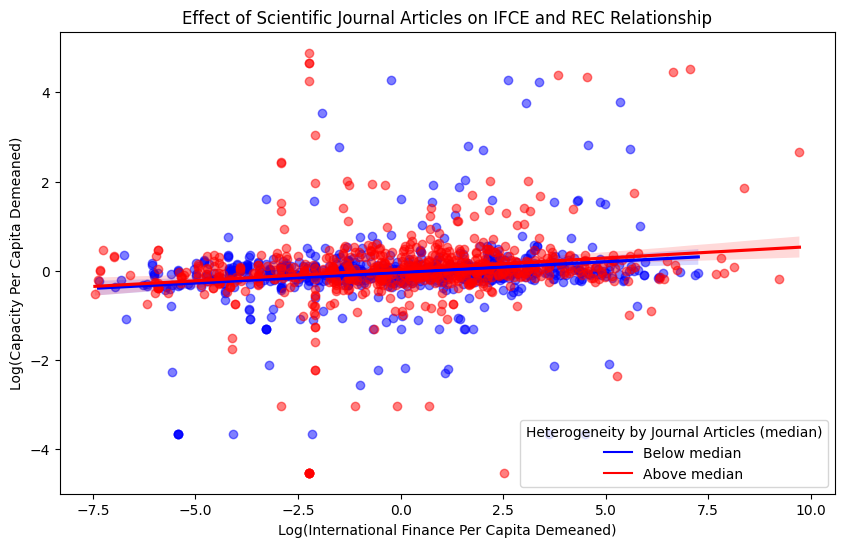

In [ ]:
# @title ##### Figure 5: Effect of Scientific Journal Articles on IFCE and REC Relationship
# Filter and process the data
database_fixed = database[(database['year'] > 2004)]
data = database_fixed.copy()
data = data[data['year'] != 2021]

if 'journal_articles_normalized' not in data.columns:
    data['journal_articles_normalized'] = data['journal_articles'] / data['population']

variables_to_demean = ['international_finance_per_capita_log', 'capacity_per_capita_log']
for var in variables_to_demean:
    data[f'{var}_demeaned'] = data[var] - data.groupby('country')[var].transform('mean')


x = 'international_finance_per_capita_log_demeaned'
y = 'capacity_per_capita_log_demeaned'

heterogeneity_variable = 'journal_articles_normalized'
threshold = data[heterogeneity_variable].median()

lower_group = data[data[heterogeneity_variable] <= threshold]
higher_group = data[data[heterogeneity_variable] > threshold]

plt.figure(figsize=(10, 6))

colors = {'lower': 'blue', 'higher': 'red'}

model_lower = LinearRegression()
X_lower = lower_group[[x]]
y_lower = lower_group[y]
model_lower.fit(X_lower, y_lower)
slope_lower = model_lower.coef_[0]
intercept_lower = model_lower.intercept_
equation_lower = f"y = {intercept_lower:.2f} + {slope_lower:.2f}x"

sns.regplot(
    x= x,
    y=y,
    data=lower_group,
    scatter_kws={'color': colors['lower'], 'alpha': 0.5},
    line_kws={'color': colors['lower'], 'label': f"Lower: {equation_lower}"}
)


model_higher = LinearRegression()
X_higher = higher_group[[x]]
y_higher = higher_group[y]
model_higher.fit(X_higher, y_higher)
slope_higher = model_higher.coef_[0]
intercept_higher = model_higher.intercept_
equation_higher = f"y = {intercept_higher:.2f} + {slope_higher:.2f}x"

sns.regplot(
    x=x,
    y=y,
    data=higher_group,
    scatter_kws={'color': colors['higher'], 'alpha': 0.5},
    line_kws={'color': colors['higher'], 'label': f"Higher: {equation_higher}"}
)

lower_handle = mlines.Line2D([], [], color=colors['lower'], label=f"Below median")
higher_handle = mlines.Line2D([], [], color=colors['higher'], label=f"Above median")
plt.legend(handles=[lower_handle, higher_handle], title='Heterogeneity by Journal Articles (median)')


plt.xlabel('Log(International Finance Per Capita Demeaned)')
plt.ylabel('Log(Capacity Per Capita Demeaned)')
plt.title('Effect of Scientific Journal Articles on IFCE and REC Relationship')

plt.show()

**What are the results and what do we conclude?**

The heterogeneity variable does not appear to have the expected effect without controls. This could be due to the variable being an insufficient proxy, failing to capture the level of innovativeness accurately, or the hypothesis that higher innovativeness leads to an amplified effect of finance does not hold for developing countries. However, when the test is conducted with controls and fixed effects (see Figure 6), the anticipated disparity becomes visible, although only partially statistically significant  ([Appendix C4: OLS with Controls of Heterogeneity Variable](#scrollTo=97KCJiNFzSPo&line=1&uniqifier=1)). Consequently, we do not have strong evidence for the hypotheses that higher innovativeness leads to better IFRE conversion.

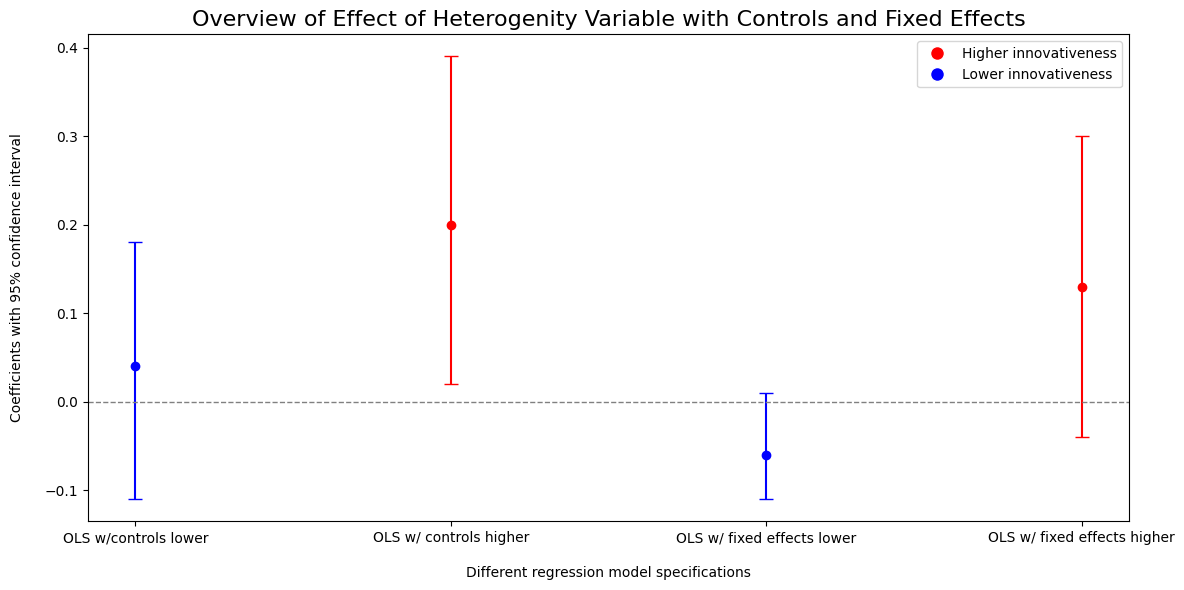

In [ ]:
# @title ##### Figure 6: Overview of Effect of Heterogenity Variable with Controls and Fixed Effects
data = {
    "Model": ["OLS w/controls lower",  "OLS w/ controls higher",  "OLS w/ fixed effects lower", "OLS w/ fixed effects higher"],
    "Coefficient": [0.04, 0.20, -0.06,  0.13,],
    "Lower_CI": [-0.11, 0.02, -0.11, -0.04],
    "Upper_CI": [0.18, 0.39, 0.01,  0.30],
    "P_value": [0.00, 0.00, 0.00,  0.00],
}

df = pd.DataFrame(data)


colors = ["blue", "red", "blue", "red"]


fig, ax = plt.subplots(figsize=(12, 6))

for idx, row in df.iterrows():
    ax.errorbar(
        idx, row["Coefficient"],
        yerr=[[row["Coefficient"] - row["Lower_CI"]], [row["Upper_CI"] - row["Coefficient"]]],
        fmt='o', color=colors[idx], capsize=5
    )


legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10, label='Higher innovativeness'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10, label='Lower innovativeness')
]
ax.legend(handles=legend_elements, loc='upper right')


ax.set_xticks(range(len(df)))
ax.set_xticklabels(df["Model"], rotation=0, ha='center')
ax.axhline(y=0, color='gray', linestyle='--', linewidth=1)
ax.set_ylabel("Coefficients with 95% confidence interval", fontsize=10, labelpad=15)
ax.set_xlabel("Different regression model specifications", fontsize=10, labelpad=15)
ax.set_title("Overview of Effect of Heterogenity Variable with Controls and Fixed Effects", fontsize=16)
plt.tight_layout()

plt.show()

## **7 What are the limitations of our investigation and how can we improve?** 🔮

We identified multiple limitations in our analysis, that should be addressed in future research. First, we only looked at the increase in REC, potential depreciation was not considered. This issue is difficult to tackle due to a lack of data. Second, our log(x + constant) transformation could have an impact on the results. A sensitivity analysis of the effect of changing the constant should be conducted. Changing the analysis from stock to yearly flows could be interesting as well, though this introduces the problem of negative growth values. A third limitation is that our data included all types of REC technologies (hydro, solar, water, etc.) and there was no differentiation made between the type of IFCE (loans, grants, and investments). This might affect the timeframe and magnitude of the effect of IFCE on REC. Future research could conduct a more granular analysis taking into account the type of REC technology and type of financing, leading to more accurate results.




## **8 What do we conclude?** 🔖

We could not find enough evidence through our analysis to support our hypotheses that



1.   IFCE has an effect on REC, and that
2.   Effect is stronger for more innovative countries.




But does that mean there is no effect? **Certainly not, and we want to emphasize that here.** Even though we could not distill the effect, there could be many factors that obscure it. Our results at least hint at the expected effect, and a more refined research approach, addressing the omitted variable of domestic finance and the potential reverse causality, might be able to untangle it. For the future development of REC in developing countries, investments are crucial, and should not be discouraged by our analysis.



---



## **Appendix**

### **Appendix A: For the Interested Reader**

#### **Appendix A1: Normality of Residuals**

For a OLS regression, the residuals should be normally distributed to allow for optimal interpretability. In our case, as it can be seen below for the basic regression, this is not necessarily the case. This means that we will have to be cautious when drawing conclusions from our regression analysis.

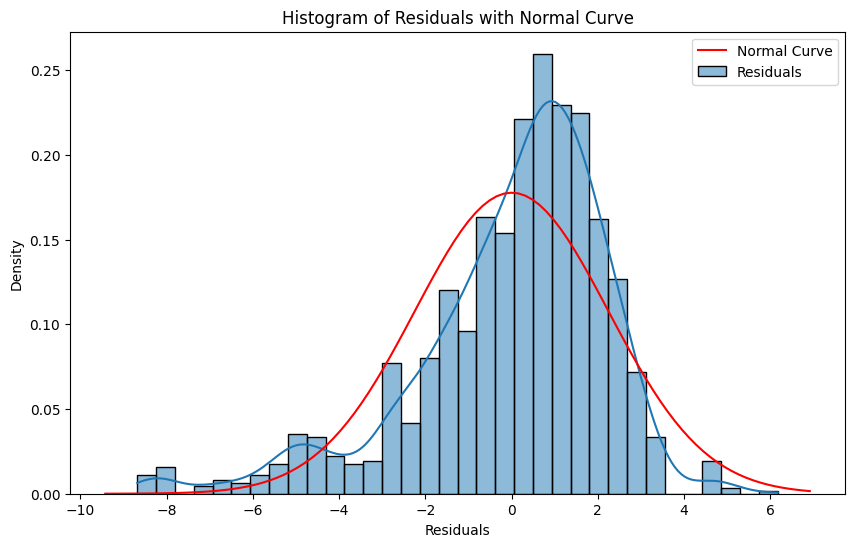

In [ ]:
# @title ##### **Histogram of Residuals**
model = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})

residuals = model.resid

plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, stat='density', label='Residuals')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, loc=residuals.mean(), scale=residuals.std())
plt.plot(x, p, 'r', label='Normal Curve')

plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of Residuals with Normal Curve')
plt.legend()
plt.show()

#### **Appendix A2: Multicollinari-what?**

A further important assumption of OLS is non-multicollinearity. This means, that none of the independent variables are too similar to each other and thereby undermines the statistical significance of the independent variables concerned. For us, only the different years appear to be affected, as due to the cumulative nature their values are quite similar. We will need to keep an eye on that in our further analysis.

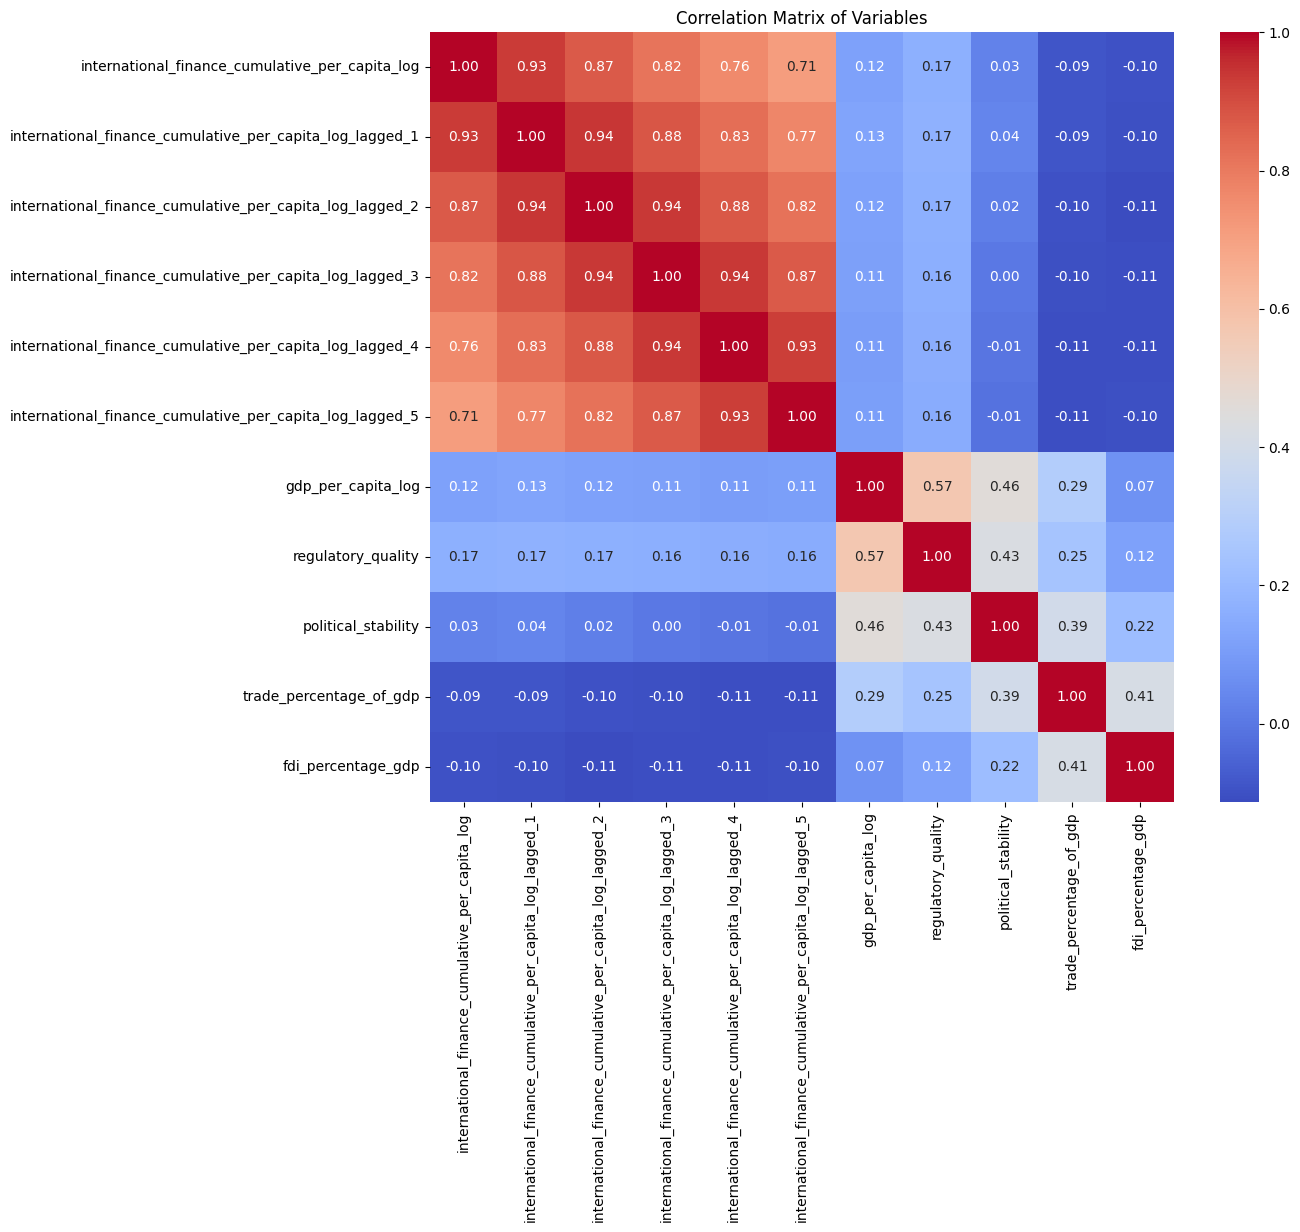

In [ ]:
# @title ##### **Multicollinearity Matrix**
controls = [
    'international_finance_cumulative_per_capita_log',
    'international_finance_cumulative_per_capita_log_lagged_1',
    'international_finance_cumulative_per_capita_log_lagged_2',
    'international_finance_cumulative_per_capita_log_lagged_3',
    'international_finance_cumulative_per_capita_log_lagged_4',
    'international_finance_cumulative_per_capita_log_lagged_5',
    'gdp_per_capita_log',
    'regulatory_quality',
    'political_stability',
    'trade_percentage_of_gdp',
    'fdi_percentage_gdp'
]

correlation_matrix = database_fixed[controls].corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')
plt.show()

#### **Appendix A3: Mysterious Outliers**

The switch to a very high p-value (indicating non-statistically significant results) after introducing fixed effects made us wonder. When we changed the type of standard errors from standard to clustered (at the country level), the p-value for our main results increased dramatically, moving it into a range of non-statistical significance. This indicated that the choice of standard error type significantly impacted our findings. Clustered standard errors account for potential intra-cluster correlations, meaning that they give more weight to variability within clusters (countries in this case). As changing to clustered standard errors gives more weight to these within errors, we suspected to find some outliers following this hint. And, as expected, we made some interesting findings by looking at the residuals as shown below:

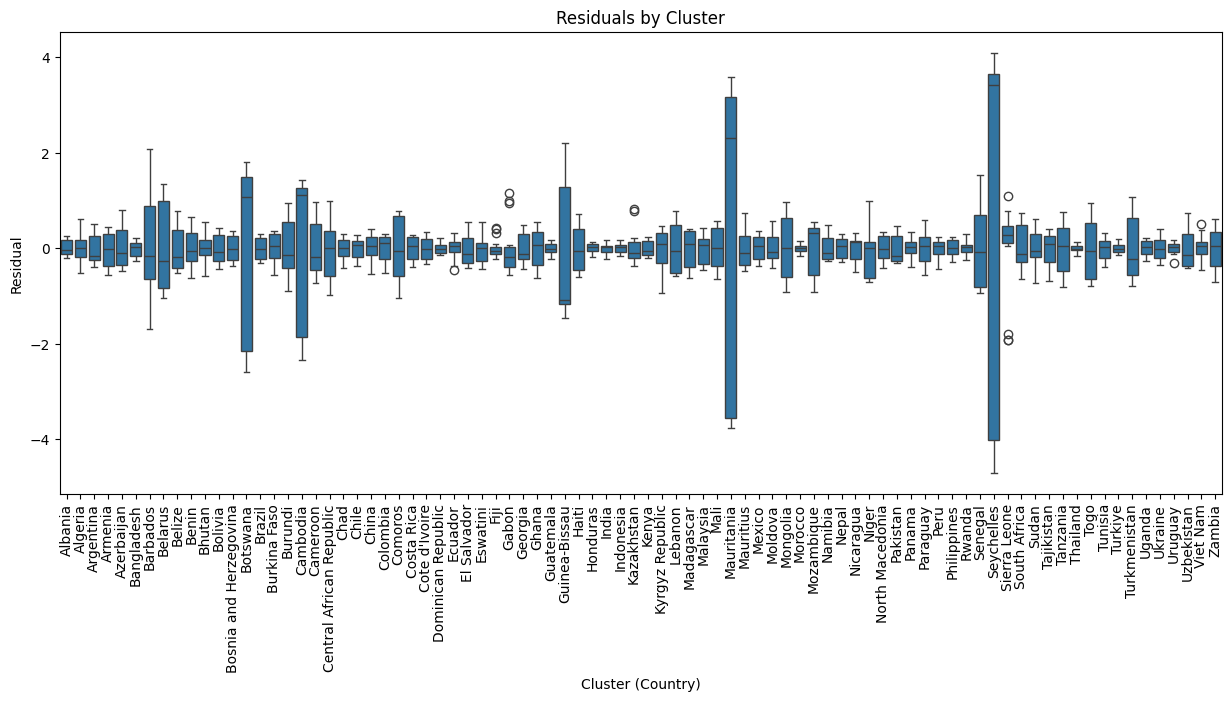

In [ ]:
# @title ##### **Residuals by cluster (country)**
database_fixed = database[(database['year'] > 2004)]
data_fe = database_fixed.set_index(['country', 'year'])

model = PanelOLS.from_formula(
    'capacity_per_capita_log ~ 1+ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5 + gdp_per_capita_log + regulatory_quality + political_stability +  trade_percentage_of_gdp + fdi_percentage_gdp + EntityEffects + TimeEffects',
    data=data_fe)

# Create model
result = model.fit()

# Extract residuals and cluster identifiers
residuals = result.resids
clusters = data_fe.index.get_level_values('country')

# Combine residuals and clusters into a df
residuals_df = pd.DataFrame({'cluster': clusters, 'residual': residuals})

# Plot residuals by cluster
plt.figure(figsize=(15, 6))
sns.boxplot(x='cluster', y='residual', data=residuals_df)
plt.title('Residuals by Cluster')
plt.xlabel('Cluster (Country)')
plt.ylabel('Residual')
plt.xticks(rotation=90)
plt.show()

It appears that some countries have significant outliers regarding the residuals. In a next step, we removed those eyeballed outliers from our regression.

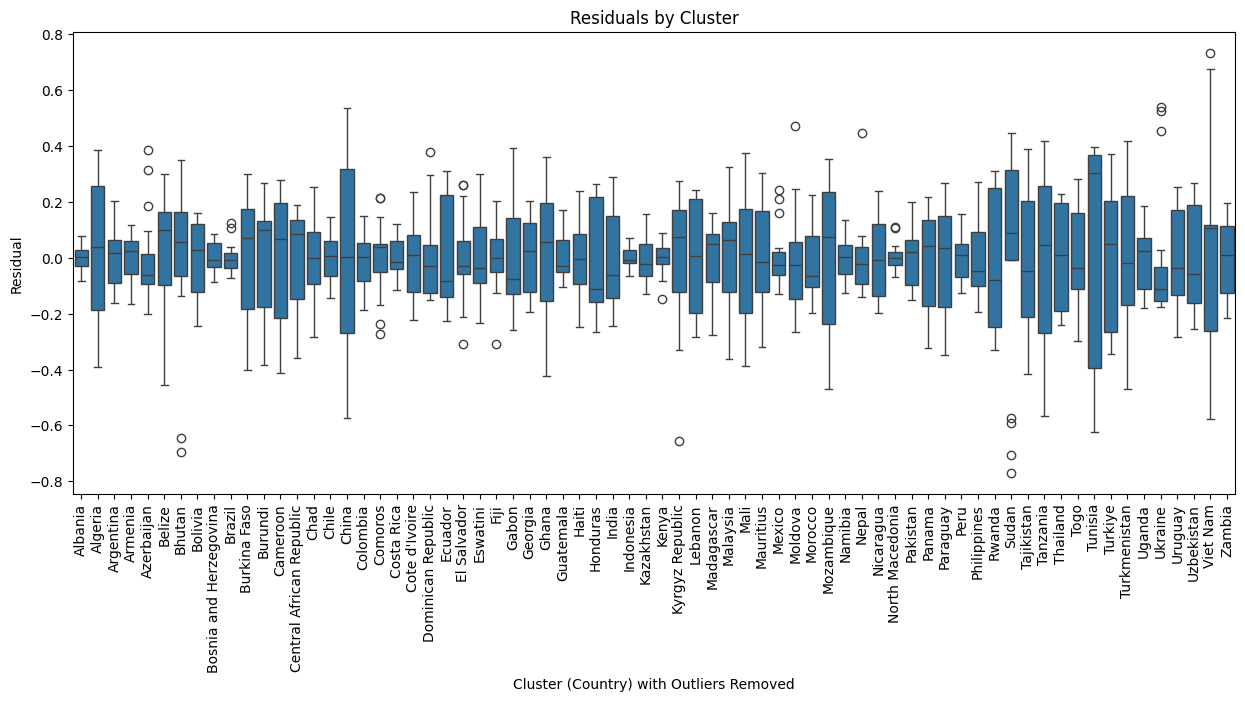

In [ ]:
# @title ##### **Residuals by cluster (country) with outliers removed**
# List of countries that appear to be outliers
countries_to_drop = ['Sierra Leone', 'Benin', 'Niger', 'Belarus', 'Mongolia', 'South Africa', 'Bangladesh', 'Barbados','Botswana', 'Cambodia','Guinea-Bissau' ,'Mauritania', 'Seychelles', 'Senegal']

# Index
database_fixed = database[(database['year'] > 2004)]

# Remove countries that appear to be outliers
database_fixed_cleaned = database_fixed[~database_fixed['country'].isin(countries_to_drop)]

# Index
data_fe = database_fixed_cleaned.set_index(['country', 'year'])

# Specify the regression formula with entity fixed effects
model = PanelOLS.from_formula(
    'capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5 + gdp_per_capita_log + regulatory_quality + political_stability +  trade_percentage_of_gdp + fdi_percentage_gdp + TimeEffects + EntityEffects',
    data=data_fe)

# Display the summary
result = model.fit(cov_type='clustered', cluster_entity=True)

# result.summary.tables[1]


# Extract residuals and cluster identifiers
residuals = result.resids
clusters = data_fe.index.get_level_values('country')

# Combine residuals and clusters into a DataFrame
residuals_df = pd.DataFrame({'cluster': clusters, 'residual': residuals})

# Plot residuals by cluster
plt.figure(figsize=(15, 6))
sns.boxplot(x='cluster', y='residual', data=residuals_df)
plt.title('Residuals by Cluster')
plt.xlabel('Cluster (Country) with Outliers Removed')
plt.ylabel('Residual')
plt.xticks(rotation=90)
plt.show()

When removing the eyeballed outlier countries, the p-value becomes statistically significant, but only slightly. Interestingly, the coefficient for IFCE becomes negative and close to zero. The confidence interval also includes zero. Even though with this analysis we are wading into the terrain of "p-hacking" since we deliberately remove obrservations that we do not "like", this leads us to believe that some outlier countries were driving our results. Therefore, our evidence of finding a causal relationship between REC and IFCE becomes thinner and thinner.

In [ ]:
# @title ##### **Regression Table with Outliers Removed**
result.summary.tables[1]

,Parameter,Std. Err.,T-stat,P-value,Lower CI,Upper CI
international_finance_cumulative_per_capita_log,-0.0147,0.0088,-1.6677,0.0957,-0.0319,0.0026
international_finance_cumulative_per_capita_log_lagged_1,-0.0054,0.0039,-1.3924,0.1641,-0.0130,0.0022
international_finance_cumulative_per_capita_log_lagged_2,-0.0099,0.0050,-1.9947,0.0463,-0.0197,-0.0002
international_finance_cumulative_per_capita_log_lagged_3,-0.0025,0.0035,-0.7163,0.4740,-0.0092,0.0043
international_finance_cumulative_per_capita_log_lagged_4,-0.0001,0.0028,-0.0357,0.9715,-0.0057,0.0055
international_finance_cumulative_per_capita_log_lagged_5,0.0015,0.0073,0.2043,0.8382,-0.0128,0.0158
gdp_per_capita_log,0.2522,0.1382,1.8242,0.0684,-0.0191,0.5234
regulatory_quality,-0.1331,0.0737,-1.8051,0.0713,-0.2777,0.0116
political_stability,-0.0260,0.0602,-0.4318,0.6660,-0.1442,0.0922
trade_percentage_of_gdp,-0.0008,0.0015,-0.5069,0.6123,-0.0037,0.0022


#### **Appendix A4: Causal inference and AI? How does that work?**


**Doube Machine Learning Tree Model without Fixed Effects**

Recent advances in causal inference now allow for the integration of machine learning techniques into OLS, a method known as Double Machine Learning (DML). DML selects a specific set of confounders and potentially adapts them (e.g., by altering their functional form) to provide more accurate results. Using one of these models (decision tree), we obtained a higher coefficient of 0.24*** when compared to our multiple linear regression. However, a downside of these models is their "black box" nature: we cannot directly observe which of our confounders the model selects or how it modifies their functional form.

In [ ]:
# @title ##### **DML without Fixed Effects**

### Code from course .ipynb used

database_fixed = database[(database['year'] > 2004)]

obj_dml_data_from_df = DoubleMLClusterData(database_fixed, 'capacity_per_capita_log', 'international_finance_cumulative_per_capita_log', ['country'], x_cols=[ 'gdp_per_capita','regulatory_quality', 'political_stability', 'trade_percentage_of_gdp', 'fdi_percentage_gdp'])

# Print the DoubleMLClusterData object to display its properties and data information.


# Define a Decision Tree Regressor with simple, fixed parameters
tree_model = DecisionTreeRegressor(
    max_depth=10,  # Limit the depth of the tree to prevent overfitting
    min_samples_split=50,  # Minimum samples required to split a node
    min_samples_leaf=20  # Minimum samples required to be at a leaf node
)

# Initialize DoubleMLPLR with the Decision Tree model for both outcome and treatment models
dml_tree= dml.DoubleMLPLR(
    obj_dml_data_from_df,   # This is the DoubleML data object
    ml_l=tree_model,  # Decision Tree model for outcome regression
    ml_m=tree_model,  # Decision Tree model for treatment regression
    n_folds=3         # Use 3-fold cross-fitting (simpler for students to understand)
)

# Fit the DoubleMLPLR model
dml_tree.fit(store_predictions=True)

# Store the model summary in a variable
tree_summary = dml_tree.summary  # Assigns the model summary to the 'forest_summary' variable


# Display the summary of the estimated Average Treatment Effect (ATE)


# Estimate the ATE using Random Forest as the machine learning model

# randomForest: Initialize a Random Forest Regressor for outcome regression
randomForest = RandomForestRegressor(
    n_estimators=500,  # Number of trees in the forest
    max_depth=7,  # Maximum depth of each tree
    max_features=3,  # Number of features to consider when looking for the best split
    min_samples_leaf=3)  # Minimum number of samples required to be at a leaf node

# Initialize the DoubleMLPLR model with Random Forest learners
dml_plr_forest = dml.DoubleMLPLR(obj_dml_data_from_df,  # Uses the 'data_dml_base' DoubleMLData object
                                 ml_l=randomForest,  # Specifies the Random Forest Regressor for outcome regression
                                 ml_m=randomForest,  # Specifies the Random Forest Classifier for treatment regression
                                 n_folds=3)  # Sets the number of folds for cross-fitting to 3

# Fit the DoubleMLPLR model to the data
dml_plr_forest.fit(store_predictions=True)  # Fits the model and stores predictions

# Store the model summary in a variable
forest_summary = dml_plr_forest.summary  # Assigns the model summary to the 'forest_summary' variable

# Print the model summary
print(forest_summary)  # Displays the estimated ATE and other model information

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



                                                     coef   std err         t  \
international_finance_cumulative_per_capita_log  0.243139  0.054782  4.438272   

                                                    P>|t|     2.5 %    97.5 %  
international_finance_cumulative_per_capita_log  0.000009  0.135768  0.350511  


**Results from DML Tree Model with Fixed Effects**

We also ran a DML regression tree model with fixed effects. In this case (similar to the standard OLS with fixed effects), the p-value is very high and the results are not statistically significant.

In [ ]:
# @title ##### **DML with Fixed Effects**

### Code from course .ipynb used

database_fixed = database[(database['year'] > 2004)]

# Identify columns to compute first differences (excluding 'unobserved_confounder' and 'unobserved_fe')
columns_to_diff =['gdp_per_capita', 'capacity_per_capita_log', 'international_finance_cumulative_per_capita_log', 'regulatory_quality', 'political_stability', 'trade_percentage_of_gdp', 'fdi_percentage_gdp']

# Sort the DataFrame by 'id' and 'year' to ensure correct ordering
df_sorted = database_fixed.sort_values(['country', 'year']).reset_index(drop=True)

# Compute the first difference within each individual group
df_diff = df_sorted.groupby('country')[columns_to_diff].diff().dropna()  # Drop NaN for the first observation in each group

# Retain 'id', 'year', 'unobserved_confounder', and 'unobserved_fe' as they are
df_diff[['country', 'year']] = df_sorted[['country', 'year']].iloc[1:].reset_index(drop=True)

# **Check for and handle NaN values in the 'id' column**
if df_diff['country'].isnull().any():
    # Handle NaN values, for example, by filling with a specific value or dropping rows
    # df_diff['id'].fillna(value, inplace=True)  # Replace NaN with 'value'
    df_diff.dropna(subset=['country'], inplace=True)  # Drop rows with NaN in 'id'

obj_dml_diff = DoubleMLClusterData(df_diff, 'capacity_per_capita_log', 'international_finance_cumulative_per_capita_log', ['country'], x_cols=[ 'regulatory_quality', 'political_stability', 'trade_percentage_of_gdp', 'fdi_percentage_gdp', 'gdp_per_capita'])

# Define a Decision Tree Regressor with simple, fixed parameters
tree_model = DecisionTreeRegressor(
    max_depth=10,  # Limit the depth of the tree to prevent overfitting
    min_samples_split=50,  # Minimum samples required to split a node
    min_samples_leaf=20  # Minimum samples required to be at a leaf node
)

# Initialize DoubleMLPLR with the Decision Tree model for both outcome and treatment models
dml_tree= dml.DoubleMLPLR(
    obj_dml_diff,   # This is the DoubleML data object
    ml_l=tree_model,  # Decision Tree model for outcome regression
    ml_m=tree_model,  # Decision Tree model for treatment regression
    n_folds=3         # Use 3-fold cross-fitting (simpler for students to understand)
)

# Fit the DoubleMLPLR model
dml_tree.fit(store_predictions=True)

# Store the model summary in a variable
tree_diff_summary = dml_tree.summary  # Assigns the model summary to the 'forest_summary' variable


# Display the summary of the estimated Average Treatment Effect (ATE)
print(dml_tree.summary)

                                                     coef   std err         t  \
international_finance_cumulative_per_capita_log  0.005105  0.011213  0.455294   

                                                    P>|t|     2.5 %    97.5 %  
international_finance_cumulative_per_capita_log  0.648898 -0.016871  0.027081  


/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.

/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.





---



### **Appendix B: Figures**

In [ ]:
#@title #### **Appendix B1: Overview of Variables**
import pandas as pd
from tabulate import tabulate

data = {
    "Variable Name": [
        "Renewable-Energy Generating Capacity",
        "International Finance for Clean Energy",
        "GDP per capita (constant US$)",
        "Trade openess",
        "Regulatory quality",
        "FDI (% of GDP)",
        "Plotical Stability",
        "Scientific Journals",
        "Control of Corruption",
        "Globalization Index"
    ],
    "Type": [
        "Dependent",
        "Indipendent",
        "Confounder",
        "Confounder",
        "Confounder",
        "Confounder",
        "Confounder",
        "Heterogeneity",
        "Instrumental",
        "Instrumental"
    ],
    "Source": [
        "UnStat",
        "UnStat",
        "The World Bank",
        "The World Bank",
        "The World Bank",
        "Our World in Data",
        "The World Bank",
        "The World Bank; United Nations, Our World in Data",
        "Our World in Data",
        "The QoG Institute"
    ],
    "Description": [
        "Capacity of renewable energy generation in a region or country.",
        "International funding dedicated to clean energy projects.",
        "Economic output per capita in constant US dollars.",
        "Extent of trade as a percentage of GDP.",
        "Perception of the government's ability to implement regulations effectively.",
        "Foreign direct investment as a percentage of GDP.",
        "Perceived stability of the political environment.",
        "Number of published scientific journals or articles.",
        "Reflects the extent to which public power is exercised for private gain.",
        "It refers to a country's level of political engagement, measured by factors like the number of embassies, international non-governmental organizations (NGOs), and participation in UN peacekeeping missions."
    ]
}

df = pd.DataFrame(data)

print(tabulate(df, headers="keys", tablefmt="fancy_grid", showindex=False))


╒════════════════════════════════════════╤═══════════════╤═══════════════════════════════════════════════════╤═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Variable Name                          │ Type          │ Source                                            │ Description                                                                                                                                                                                                   │
╞════════════════════════════════════════╪═══════════════╪═══════════════════════════════════════════════════╪═══════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ Renewable-Energy Generating Capacity   │ 

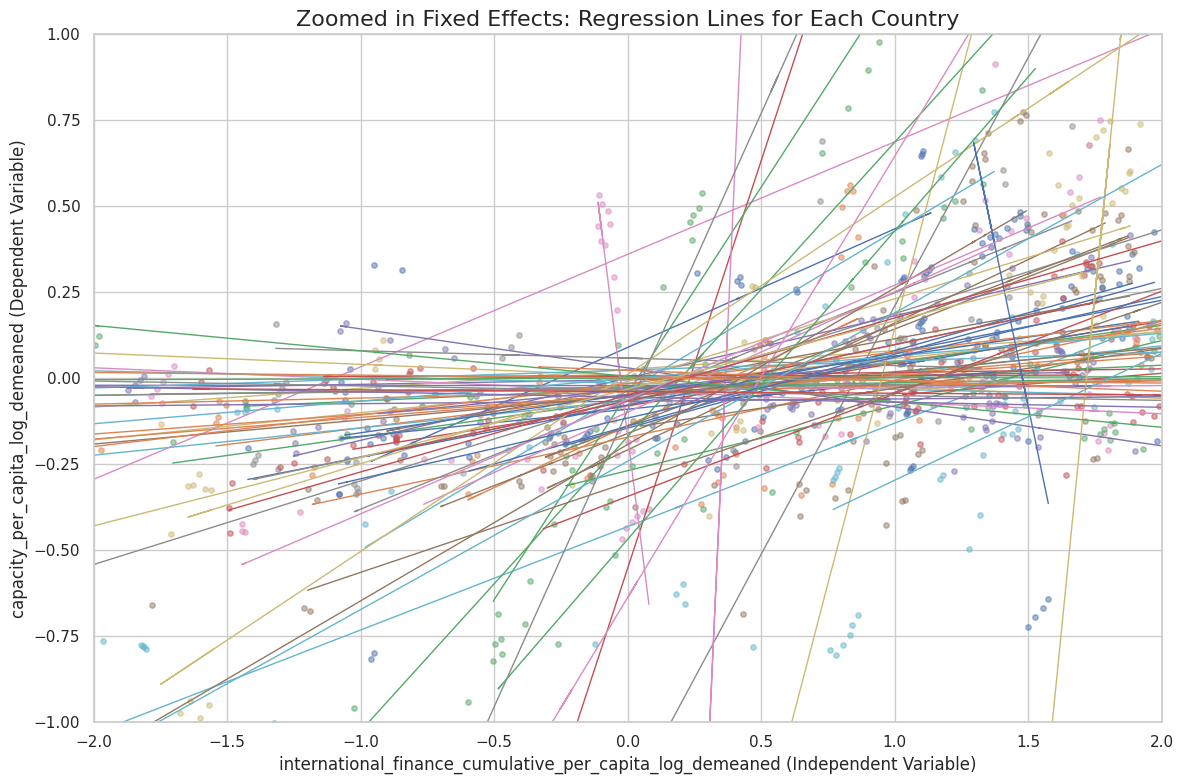

In [ ]:
# @title #### **Appendix B2: Overview of Country Fixed Effects**

database_fixed = database[(database['year'] > 2004)]

plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")


for entity in database_fixed['country'].unique():

    group_data = database_fixed[database_fixed['country'] == entity]


    X = sm.add_constant(group_data['international_finance_cumulative_per_capita_log_demeaned'])
    model = sm.OLS(group_data['capacity_per_capita_log_demeaned'], X).fit()
    regression_line = model.predict(X)


    plt.scatter(group_data['international_finance_cumulative_per_capita_log_demeaned'], group_data['capacity_per_capita_log_demeaned'], alpha=0.5, label=f'Entity {entity}', s=15)
    plt.plot(group_data['international_finance_cumulative_per_capita_log_demeaned'], regression_line, label=f'Regression: Entity {entity}', linewidth=1)

# Zoom
plt.xlim(-2, 2)
plt.ylim(-1, 1)

plt.title('Zoomed in Fixed Effects: Regression Lines for Each Country', fontsize=16)
plt.xlabel('international_finance_cumulative_per_capita_log_demeaned (Independent Variable)', fontsize=12)
plt.ylabel('capacity_per_capita_log_demeaned (Dependent Variable)', fontsize=12)

# plt.legend(loc='upper right', fontsize=10, ncol=2, bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

#### **Appendix B3: IV Tests**

##### **First Test**

The first test determines if the IV has an effect on the independent variable, important since we want to exploit those variations. We test both corruption_control and political_globalization:

In [ ]:
# @title ###### **Test 1: Corruption Control**
database_fixed = database[(database['year'] > 2004)]
data_iv = database_fixed.set_index(['country', 'year'])

exog_vars = ['corruption_control', 'gdp_per_capita_log',
    'trade_percentage_of_gdp', 'regulatory_quality', 'political_stability',
    'fdi_percentage_gdp']

exog = sm.add_constant(data_iv[exog_vars])

model_first_test = PanelOLS(data_iv.international_finance_cumulative_per_capita_log, exog, entity_effects=True)

results_model_first_test = model_first_test.fit(cov_type='clustered', cluster_entity=True)

print("Relevance Model Results:")
print(results_model_first_test)

Relevance Model Results:
                                         PanelOLS Estimation Summary                                         
Dep. Variable:     international_finance_cumulative_per_capita_log   R-squared:                        0.2810
Estimator:                                                PanelOLS   R-squared (Between):             -4.4388
No. Observations:                                             1428   R-squared (Within):               0.2810
Date:                                             Sun, Sep 14 2025   R-squared (Overall):             -1.4602
Time:                                                     18:05:23   Log-likelihood                   -3038.0
Cov. Estimator:                                          Clustered                                           
                                                                     F-statistic:                      87.135
Entities:                                                       84   P-value                   

In [ ]:
# @title ###### **Test 1: Political Globalization**
database_fixed = database[(database['year'] > 2004)]
data_iv = database_fixed.set_index(['country', 'year'])

exog_vars = ['political_globalization', 'gdp_per_capita_log',
    'trade_percentage_of_gdp', 'regulatory_quality', 'political_stability',
    'fdi_percentage_gdp']

exog = sm.add_constant(data_iv[exog_vars])

model_first_test = PanelOLS(data_iv.international_finance_cumulative_per_capita_log, exog, entity_effects=True)

results_model_first_test = model_first_test.fit(cov_type='clustered', cluster_entity=True)

print("Relevance Model Results:")
print(results_model_first_test)

Relevance Model Results:
                                         PanelOLS Estimation Summary                                         
Dep. Variable:     international_finance_cumulative_per_capita_log   R-squared:                        0.3389
Estimator:                                                PanelOLS   R-squared (Between):             -5.3436
No. Observations:                                             1428   R-squared (Within):               0.3389
Date:                                             Sun, Sep 14 2025   R-squared (Overall):             -1.7575
Time:                                                     18:05:23   Log-likelihood                   -2978.0
Cov. Estimator:                                          Clustered                                           
                                                                     F-statistic:                      114.32
Entities:                                                       84   P-value                   

##### **Second Test**

Since corruption_control failed the first test, we only consider political_globalization from now on.

In [ ]:
# @title ###### **Test 2: Political Globalization**

database_fixed = database[(database['year'] > 2004)]
data_iv = database_fixed.set_index(['country', 'year'])

exog_vars = ['political_globalization', 'gdp_per_capita_log',
    'trade_percentage_of_gdp', 'regulatory_quality', 'political_stability',
    'fdi_percentage_gdp']

exog = sm.add_constant(data_iv[exog_vars])

model_first_test = PanelOLS(data_iv.capacity_per_capita_log, exog, entity_effects=True)

results_model_first_test = model_first_test.fit(cov_type='clustered', cluster_entity=True)

print("Relevance Model Results:")
print(results_model_first_test)

Relevance Model Results:
                             PanelOLS Estimation Summary                             
Dep. Variable:     capacity_per_capita_log   R-squared:                        0.1873
Estimator:                        PanelOLS   R-squared (Between):              0.0702
No. Observations:                     1428   R-squared (Within):               0.1873
Date:                     Sun, Sep 14 2025   R-squared (Overall):              0.0846
Time:                             18:05:23   Log-likelihood                   -1653.9
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      51.400
Entities:                               84   P-value                           0.0000
Avg Obs:                            17.000   Distribution:                  F(6,1338)
Min Obs:                            17.000                                           
Max Obs:                     

##### **Third Test**

Since political globalization passes the second test, we move to the third one.

In [ ]:
# @title ###### **Test 3: Political Globalization**

database_fixed = database[(database['year'] > 2004)]
data_iv = database_fixed.set_index(['country', 'year'])

exog_vars = ['political_globalization', 'international_finance_cumulative_per_capita_log', 'international_finance_cumulative_per_capita_log_lagged_1', 'international_finance_cumulative_per_capita_log_lagged_2'  , 'international_finance_cumulative_per_capita_log_lagged_3' , 'international_finance_cumulative_per_capita_log_lagged_4' , 'international_finance_cumulative_per_capita_log_lagged_5' , 'gdp_per_capita_log',
    'trade_percentage_of_gdp', 'regulatory_quality', 'political_stability',
    'fdi_percentage_gdp']

exog = sm.add_constant(data_iv[exog_vars])

model_first_test = PanelOLS(data_iv.capacity_per_capita_log, exog, entity_effects=True)

results_model_first_test = model_first_test.fit(cov_type='clustered', cluster_entity=True)

print("Relevance Model Results:")
print(results_model_first_test)

Relevance Model Results:
                             PanelOLS Estimation Summary                             
Dep. Variable:     capacity_per_capita_log   R-squared:                        0.2342
Estimator:                        PanelOLS   R-squared (Between):              0.0906
No. Observations:                     1428   R-squared (Within):               0.2342
Date:                     Sun, Sep 14 2025   R-squared (Overall):              0.1082
Time:                             18:05:24   Log-likelihood                   -1611.4
Cov. Estimator:                  Clustered                                           
                                             F-statistic:                      33.954
Entities:                               84   P-value                           0.0000
Avg Obs:                            17.000   Distribution:                 F(12,1332)
Min Obs:                            17.000                                           
Max Obs:                     

Despite being at a lower level of statistical significance, political globalization remains relevant in the regression. Therefore, it cannot be used as an IV.

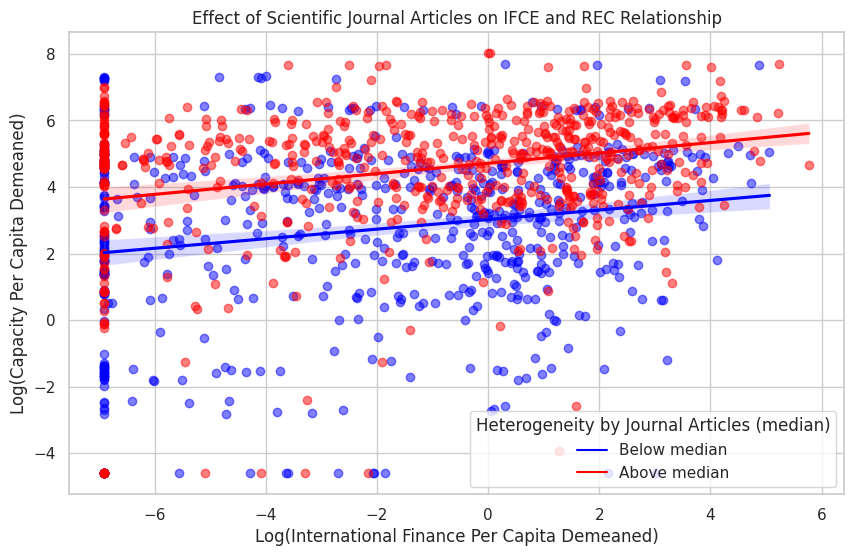

In [ ]:
# @title ### **Appendix B4: Effect of Scientific Journal Articles on IFCE and REC Relationship (whithout fixed effects)**

database_fixed = database[(database['year'] > 2004)]
data = database_fixed.copy()
data = data[data['year'] != 2021]

if 'journal_articles_normalized' not in data.columns:
    data['journal_articles_normalized'] = data['journal_articles'] / data['population']

variables_to_demean = ['international_finance_per_capita_log', 'capacity_per_capita_log']
for var in variables_to_demean:
    data[f'{var}_demeaned'] = data[var] - data.groupby('country')[var].transform('mean')


x = 'international_finance_per_capita_log'
y = 'capacity_per_capita_log'

heterogeneity_variable = 'journal_articles_normalized'
threshold = data[heterogeneity_variable].median()

lower_group = data[data[heterogeneity_variable] <= threshold]
higher_group = data[data[heterogeneity_variable] > threshold]

plt.figure(figsize=(10, 6))

colors = {'lower': 'blue', 'higher': 'red'}

model_lower = LinearRegression()
X_lower = lower_group[[x]]
y_lower = lower_group[y]
model_lower.fit(X_lower, y_lower)
slope_lower = model_lower.coef_[0]
intercept_lower = model_lower.intercept_
equation_lower = f"y = {intercept_lower:.2f} + {slope_lower:.2f}x"

sns.regplot(
    x= x,
    y=y,
    data=lower_group,
    scatter_kws={'color': colors['lower'], 'alpha': 0.5},
    line_kws={'color': colors['lower'], 'label': f"Lower: {equation_lower}"}
)


model_higher = LinearRegression()
X_higher = higher_group[[x]]
y_higher = higher_group[y]
model_higher.fit(X_higher, y_higher)
slope_higher = model_higher.coef_[0]
intercept_higher = model_higher.intercept_
equation_higher = f"y = {intercept_higher:.2f} + {slope_higher:.2f}x"

sns.regplot(
    x=x,
    y=y,
    data=higher_group,
    scatter_kws={'color': colors['higher'], 'alpha': 0.5},
    line_kws={'color': colors['higher'], 'label': f"Higher: {equation_higher}"}
)

lower_handle = mlines.Line2D([], [], color=colors['lower'], label=f"Below median")
higher_handle = mlines.Line2D([], [], color=colors['higher'], label=f"Above median")
plt.legend(handles=[lower_handle, higher_handle], title='Heterogeneity by Journal Articles (median)')


plt.xlabel('Log(International Finance Per Capita Demeaned)')
plt.ylabel('Log(Capacity Per Capita Demeaned)')
plt.title('Effect of Scientific Journal Articles on IFCE and REC Relationship')

plt.show()



---



### **Appendix C: Regression Tables**

In [ ]:
# @title #### **Appendix C1: Regression Table to determine Lag**

# Restricting sample
database_fixed = database[(database['year'] > 2004)]

# Building multiple models
model_1_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_2_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log_lagged_1', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_3_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log_lagged_2 ', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_4_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log_lagged_3 ', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_5_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log_lagged_4', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_6_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log_lagged_5', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_7_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5', data = database_fixed).fit()
model_8_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_9_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_10_lag = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})


# Using Stargazer to create regression table
stargazer = Stargazer([model_1_lag, model_2_lag, model_3_lag, model_4_lag, model_5_lag, model_6_lag, model_7_lag, model_8_lag, model_9_lag, model_10_lag])

# Displaying the table
stargazer.significant_digits(6)
stargazer

In [ ]:
# @title #### **Appendix C2: Regression Table OLS with Controls**
# Restrict data
database_fixed = database[(database['year'] > 2004)]

# Models with progressive controls
model_1_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_2_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_3_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log + regulatory_quality', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_4_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log + regulatory_quality + political_stability', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_5_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log + regulatory_quality + political_stability + trade_percentage_of_gdp', data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})
model_6_controls = smf.ols('capacity_per_capita_log ~ international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5  + gdp_per_capita_log + regulatory_quality + political_stability + trade_percentage_of_gdp + fdi_percentage_gdp' , data = database_fixed).fit(cov_type='cluster', cov_kwds={'groups': database_fixed['country']})

# Creating multiple models
stargazer = Stargazer([model_1_controls, model_2_controls, model_3_controls, model_4_controls, model_5_controls, model_6_controls])

# Displaying the regression table (see Appendix)
stargazer.significant_digits(6)
stargazer

In [ ]:
# @title ####**Appendix C3: Regression Table OLS with Fixed Effects (clustered and non-clustered errors)**
# Index by entity and time (e.g., 'country' and 'year')
database_fixed = database[(database['year'] > 2004)]
data_fe = database_fixed.set_index(['country', 'year'])

# Specify the regression formula with entity fixed effects
model_tcfe = PanelOLS.from_formula(
    'capacity_per_capita_log ~ 1 + international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5 + gdp_per_capita_log + regulatory_quality + political_stability +  trade_percentage_of_gdp + fdi_percentage_gdp + EntityEffects + TimeEffects',
    data=data_fe)

# Display the summary
model_1 = model_tcfe.fit(cov_type='clustered', cluster_entity=True)
model_2 = model_tcfe.fit()

stargazer = Stargazer([model_1, model_2])

# Displaying the regression table (see Appendix)
stargazer.significant_digits(6)
stargazer

In [ ]:
# @title #### **Appendix C4: Regression Table of OLS with Controls of Heterogeneity Variable (with and without fixed effects)**
database_fixed = database[(database['year'] > 2004)]
data = database_fixed.copy()
data = data[data['year'] != 2021]

if 'journal_articles_normalized' not in data.columns:
    data['journal_articles_normalized'] = data['journal_articles'] / data['population']

heterogeneity_variable = 'journal_articles_normalized'
threshold = data[heterogeneity_variable].median()

lower_group = data[data[heterogeneity_variable] <= threshold]
higher_group = data[data[heterogeneity_variable] > threshold]


data_low = lower_group.set_index(['country', 'year'])
data_high = higher_group.set_index(['country', 'year'])




# Specify the regression formula with entity fixed effects
model_tcfe_low = PanelOLS.from_formula(
    'capacity_per_capita_log ~ 1 + international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5 + gdp_per_capita_log + regulatory_quality + political_stability +  trade_percentage_of_gdp + fdi_percentage_gdp + EntityEffects + TimeEffects',
    data=data_low)

model_tcfe_high = PanelOLS.from_formula(
    'capacity_per_capita_log ~ 1 + international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5 + gdp_per_capita_log + regulatory_quality + political_stability +  trade_percentage_of_gdp + fdi_percentage_gdp + EntityEffects + TimeEffects',
    data=data_high)

model_low = PanelOLS.from_formula(
    'capacity_per_capita_log ~ 1 + international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5 + gdp_per_capita_log + regulatory_quality + political_stability +  trade_percentage_of_gdp + fdi_percentage_gdp',
    data=data_low)

model_high = PanelOLS.from_formula(
    'capacity_per_capita_log ~ 1 + international_finance_cumulative_per_capita_log + international_finance_cumulative_per_capita_log_lagged_1 + international_finance_cumulative_per_capita_log_lagged_2 + international_finance_cumulative_per_capita_log_lagged_3 + international_finance_cumulative_per_capita_log_lagged_4 + international_finance_cumulative_per_capita_log_lagged_5 + gdp_per_capita_log + regulatory_quality + political_stability +  trade_percentage_of_gdp + fdi_percentage_gdp',
    data=data_high)

# Display the summary
model_1 = model_low.fit(cov_type='clustered', cluster_entity=True)
model_2 = model_high.fit(cov_type='clustered', cluster_entity=True)
model_3 = model_tcfe_low.fit(cov_type='clustered', cluster_entity=True)
model_4 = model_tcfe_high.fit(cov_type='clustered', cluster_entity=True)


stargazer = Stargazer([model_1, model_2, model_3, model_4])

# Displaying the regression table
stargazer.significant_digits(6)
stargazer



---



## **References**

1. Alharbi, S. S., Mamun, M. A., Boubaker, S., & Rizvi, S. K. A. (2023). Green finance and renewable energy: A worldwide evidence. Energy Economics, 118, 106499. https://doi.org/10.1016/j.eneco.2022.106499

2. Alshamsi, K. H., Hussin, M. R. B., & Azam, M. (2015). The impact of inflation and GDP per capita on foreign direct investment: the case of United Arab Emirates. Investment Management and Financial Innovations, 12(3–1), 132–141. https://www.businessperspectives.org/images/pdf/applications/publishing/templates/article/assets/6875/imfi_en_2015_03cont_Alshamsi.pdf

3. Aluko, O. A., Ibrahim, M., & Atagbuzia, M. O. (2020). On the causal nexus between FDI and globalization: Evidence from Africa. Journal of International Trade & Economic Development, 30(2), 203–223. https://doi.org/10.1080/09638199.2020.1823460

4. Amri, F. (2016). The relationship amongst energy consumption, foreign direct investment and output in developed and developing Countries. Renewable and Sustainable Energy Reviews, 64, 694–702. https://doi.org/10.1016/j.rser.2016.06.065

5. Attanayake, K., Wickramage, I., Samarasinghe, U., Ranmini, Y., Ehalapitiya, S., Jayathilaka, R., & Yapa, S. (2024). Renewable energy as a solution to climate change: Insights from a comprehensive study across nations. PLoS ONE, 19(6), e0299807. https://doi.org/10.1371/journal.pone.0299807

6. Borojo, D. G., Yushi, J., Gong, X., Zhang, H., & Miao, M. (2024). The heterogeneous impacts of climate finance on energy efficiency and renewable energy production in developing countries. Renewable Energy, 121427. https://doi.org/10.1016/j.renene.2024.121427

7. De Vibe, M., & Robinson, M. (2024). Working Paper 53: Good Governance and the Just Transition: Implications for Renewable Energy Companies. In Basel Institute on Governance. https://baselgovernance.org/publications/wp-53

8. Ebaidalla, E. M. (2024). The impact of taxation, technological innovation and trade openness on renewable energy investment: Evidence from the top renewable energy producing countries. Energy, 306, 132539. https://doi.org/10.1016/j.energy.2024.132539

9. Ergun, S. J., & Rivas, M. F. (2023). Does higher income lead to more renewable energy consumption? Evidence from emerging-Asian countries. Heliyon, 9(1), e13049. https://doi.org/10.1016/j.heliyon.2023.e13049

10. Goldthau, A., Eicke, L., & Weko, S. (2020). The global energy transition and the Global South. In Lecture notes in energy (pp. 319–339). https://doi.org/10.1007/978-3-030-39066-2_14

11. Gumber, A., Zana, R., & Steffen, B. (2024). A global analysis of renewable energy project commissioning timelines. Applied Energy, 358, 122563. https://doi.org/10.1016/j.apenergy.2023.122563

12. IEA. (2018, November 1). World Energy Outlook 2018 – Analysis - IEA. https://www.iea.org/reports/world-energy-outlook-2018

13. Khalid, A. M. (2024). Does corruption hinder foreign direct investment and growth in Asia and beyond? The grabbing versus the helping hand revisited. In Asia in transition (pp. 39–67). https://doi.org/10.1007/978-981-99-9303-1_2

14. Kim, J. E. (2020). Regulation trumps economics? Examining renewable energy policy, diffusion and investment in 80 developing countries. Energy Research & Social Science, 70, 101613. https://doi.org/10.1016/j.erss.2020.101613

15. Liu, J., Zhang, D., Cai, J., & Davenport, J. (2019). Legal Systems, National Governance and Renewable Energy Investment: Evidence from Around the World. British Journal of Management, 32(3), 579–610. https://doi.org/10.1111/1467-8551.12377

16. Qamruzzaman, M., & Karim, S. (2024). Green energy, green innovation, and political stability led to green growth in OECD nations. Energy Strategy Reviews, 55, 101519. https://doi.org/10.1016/j.esr.2024.101519

17. Tan, Y., & Uprasen, U. (2022). The effect of foreign direct investment on renewable energy consumption subject to the moderating effect of environmental regulation: Evidence from the BRICS countries. Renewable Energy, 201, 135–149. https://doi.org/10.1016/j.renene.2022.11.066 UNCTAD. (2023, July 5).

18. UNCTAD calls for urgent support to developing countries to attract massive investment in clean energy. UN Trade and Development (UNCTAD). https://unctad.org/news/unctad-calls-urgent-support-developing-countries-attract-massive-investment-clean-energy

19. United Nations. (n.d.). Goal 7 | Department of Economic and Social Affairs. https://sdgs.un.org/goals/goal7#targets_and_indicators